In [2]:
# import pandas libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

#increase max row and column display value
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)

Loading data into dataframe

In [3]:
# load the data
loan = pd.read_csv('loan.csv')
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [4]:
# find the shape of loan data set 
loan.shape

(39717, 111)

# Data preparation steps

Check null value count in each columns with descending order

In [5]:
# check if null values present or not
loan.isnull().sum().sort_values(ascending=False)

verification_status_joint         39717
annual_inc_joint                  39717
mo_sin_old_rev_tl_op              39717
mo_sin_old_il_acct                39717
bc_util                           39717
bc_open_to_buy                    39717
avg_cur_bal                       39717
acc_open_past_24mths              39717
inq_last_12m                      39717
total_cu_tl                       39717
inq_fi                            39717
total_rev_hi_lim                  39717
all_util                          39717
max_bal_bc                        39717
open_rv_24m                       39717
open_rv_12m                       39717
il_util                           39717
total_bal_il                      39717
mths_since_rcnt_il                39717
open_il_24m                       39717
open_il_12m                       39717
open_il_6m                        39717
open_acc_6m                       39717
tot_cur_bal                       39717
tot_coll_amt                      39717


Finding percenage of null values in each columns

In [6]:
# finding percentage of null values
null_percentage = round(100*(loan.isnull().sum()/len(loan.index)), 2)
null_percentage[ null_percentage > 0 ]

emp_title                           6.19
emp_length                          2.71
desc                               32.59
title                               0.03
mths_since_last_delinq             64.66
mths_since_last_record             92.99
revol_util                          0.13
last_pymnt_d                        0.18
next_pymnt_d                       97.13
last_credit_pull_d                  0.01
collections_12_mths_ex_med          0.14
mths_since_last_major_derog       100.00
annual_inc_joint                  100.00
dti_joint                         100.00
verification_status_joint         100.00
tot_coll_amt                      100.00
tot_cur_bal                       100.00
open_acc_6m                       100.00
open_il_6m                        100.00
open_il_12m                       100.00
open_il_24m                       100.00
mths_since_rcnt_il                100.00
total_bal_il                      100.00
il_util                           100.00
open_rv_12m     

Dropping columns with 100% null values

In [7]:
# dropping columns having 100% null values
loan.drop(null_percentage[ null_percentage == 100 ].index, axis=1, inplace=True)

Checking if dropping 100% null values happened or not

In [8]:
# check if 100% null columns dropped or not
null_percentage = round(100*(loan.isnull().sum()/len(loan.index)), 2)
null_percentage[ null_percentage > 0 ]

emp_title                      6.19
emp_length                     2.71
desc                          32.59
title                          0.03
mths_since_last_delinq        64.66
mths_since_last_record        92.99
revol_util                     0.13
last_pymnt_d                   0.18
next_pymnt_d                  97.13
last_credit_pull_d             0.01
collections_12_mths_ex_med     0.14
chargeoff_within_12_mths       0.14
pub_rec_bankruptcies           1.75
tax_liens                      0.10
dtype: float64

We can see there are few columns having null values over 30%, so we can drop those

In [9]:
# dropping columns having 30% null values
loan.drop(null_percentage[ null_percentage >= 30 ].index, axis=1, inplace=True)

Checking if more than equal to 30% null valued column dropped or not

In [10]:
# check if 30% null columns dropped or not
null_percentage = round(100*(loan.isnull().sum()/len(loan.index)), 2)
null_percentage[ null_percentage > 0 ]

emp_title                     6.19
emp_length                    2.71
title                         0.03
revol_util                    0.13
last_pymnt_d                  0.18
last_credit_pull_d            0.01
collections_12_mths_ex_med    0.14
chargeoff_within_12_mths      0.14
pub_rec_bankruptcies          1.75
tax_liens                     0.10
dtype: float64

In [11]:
# show data
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,other,personel,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://lendingclub.com/browse/loanDetail.acti...,other,Personal,972xx,OR,17.94,0,Jan-96,0,15,0,27783,53.90%,38,f,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


Finding unique values in each columns in ascending order

In [12]:
# finding unique values in the columns
loan.nunique().sort_values(ascending=True)

tax_liens                         1
delinq_amnt                       1
chargeoff_within_12_mths          1
acc_now_delinq                    1
application_type                  1
policy_code                       1
collections_12_mths_ex_med        1
initial_list_status               1
pymnt_plan                        1
term                              2
pub_rec_bankruptcies              3
verification_status               3
loan_status                       3
pub_rec                           5
home_ownership                    5
grade                             7
inq_last_6mths                    9
delinq_2yrs                      11
emp_length                       11
purpose                          14
sub_grade                        35
open_acc                         40
addr_state                       50
issue_d                          55
total_acc                        82
last_pymnt_d                    101
last_credit_pull_d              106
int_rate                    

We can see there are columns having 1 unique values, we need to drop those columns

In [13]:
# dropping columns having only one value
loan.drop(['tax_liens', 'delinq_amnt', 'chargeoff_within_12_mths', 'acc_now_delinq', 'application_type', 'policy_code', 'collections_12_mths_ex_med', 'initial_list_status', 'pymnt_plan'], axis=1, inplace=True)

Check if single unique value column dropped or not

In [14]:
# finding unique values in the columns
loan.nunique().sort_values(ascending=True)

term                           2
pub_rec_bankruptcies           3
loan_status                    3
verification_status            3
pub_rec                        5
home_ownership                 5
grade                          7
inq_last_6mths                 9
delinq_2yrs                   11
emp_length                    11
purpose                       14
sub_grade                     35
open_acc                      40
addr_state                    50
issue_d                       55
total_acc                     82
last_pymnt_d                 101
last_credit_pull_d           106
int_rate                     371
earliest_cr_line             526
zip_code                     823
loan_amnt                    885
funded_amnt                 1041
revol_util                  1089
out_prncp                   1137
out_prncp_inv               1138
total_rec_late_fee          1356
collection_recovery_fee     2616
dti                         2868
recoveries                  4040
annual_inc

In [15]:
# see the dataframe
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,https://lendingclub.com/browse/loanDetail.acti...,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.50%,10,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,other,personel,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,https://lendingclub.com/browse/loanDetail.acti...,other,Personal,972xx,OR,17.94,0,Jan-96,0,15,0,27783,53.90%,38,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0


10. url and member_id is not useful in this context so removing those

In [16]:
loan.drop(['member_id', 'url'], axis=1, inplace=True)

check if member_id, url removed or not

In [17]:
loan.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0
1,1077430,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,bike,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
2,1077175,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.50%,10,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0
3,1076863,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,personel,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
4,1075358,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,other,Personal,972xx,OR,17.94,0,Jan-96,0,15,0,27783,53.90%,38,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0


Removing emp_title, and title, these are seems to be not useful in this context, since emp_title and title are varies companies to company

In [18]:
loan.drop(['emp_title', 'title'], axis=1, inplace=True)

Check if  emp_title, and title removed or not

In [19]:
loan.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,1077501,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0
1,1077430,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
2,1077175,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.50%,10,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0
3,1076863,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
4,1075358,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,1 year,RENT,80000.0,Source Verified,Dec-11,Current,other,972xx,OR,17.94,0,Jan-96,0,15,0,27783,53.90%,38,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0


In [20]:
loan.shape

(39717, 40)

The aim is to find risky loan applications, so the fields 'total_rec_int', 'total_rec_prncp', 'total_rec_late_fee', 'last_credit_pull_d', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d','out_prncp', 'out_prncp_inv' are not useful in this context, Since these fields are created after the loan is approved.

In [21]:
delete_columns = ['total_rec_int', 'total_rec_prncp', 'total_rec_late_fee',
            'last_credit_pull_d', 'recoveries', 'collection_recovery_fee',
            'last_pymnt_d','out_prncp', 'out_prncp_inv']
loan.drop(columns=delete_columns, axis=1, inplace=True)
loan.shape

(39717, 31)

In [22]:
loan.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,last_pymnt_amnt,pub_rec_bankruptcies
0,1077501,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,5863.155187,5833.84,171.62,0.0
1,1077430,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,1008.710000,1008.71,119.66,0.0
2,1077175,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.50%,10,3005.666844,3005.67,649.91,0.0
3,1076863,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,12231.890000,12231.89,357.48,0.0
4,1075358,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,1 year,RENT,80000.0,Source Verified,Dec-11,Current,other,972xx,OR,17.94,0,Jan-96,0,15,0,27783,53.90%,38,3513.330000,3513.33,67.79,0.0


In [23]:
loan.columns

Index(['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_length', 'home_ownership',
       'annual_inc', 'verification_status', 'issue_d', 'loan_status',
       'purpose', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'total_pymnt',
       'total_pymnt_inv', 'last_pymnt_amnt', 'pub_rec_bankruptcies'],
      dtype='object')

In [24]:
loan.shape

(39717, 31)

Find the columns having null values

In [25]:
null_perc = round(100*(loan.isnull().sum()/len(loan.index)), 2)
null_perc[ null_perc > 0 ]

emp_length              2.71
revol_util              0.13
pub_rec_bankruptcies    1.75
dtype: float64

Remove the rows having null values

In [26]:
loan.dropna(subset=['emp_length', 'revol_util', 'pub_rec_bankruptcies'], inplace=True)

Check again for null values in columns

In [27]:
null_perc = round(100*(loan.isnull().sum()/len(loan.index)), 2)
null_perc[ null_perc > 0 ]

Series([], dtype: float64)

In [28]:
loan.shape

(37898, 31)

"Loan Status" values contains values as "Fully Paid", "Charged Off" and "Current", Since we are interested in new loan applications, so we need to remove rows having values "Current"

In [29]:
#Removing current loan status rows
loan = loan[loan.loan_status != 'Current']

In [30]:
loan.shape

(36800, 31)

In [31]:
loan.dtypes

id                        int64
loan_amnt                 int64
funded_amnt               int64
funded_amnt_inv         float64
term                     object
int_rate                 object
installment             float64
grade                    object
sub_grade                object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
zip_code                 object
addr_state               object
dti                     float64
delinq_2yrs               int64
earliest_cr_line         object
inq_last_6mths            int64
open_acc                  int64
pub_rec                   int64
revol_bal                 int64
revol_util               object
total_acc                 int64
total_pymnt             float64
total_pymnt_inv         float64
last_pymnt_amnt         float64
pub_rec_bankruptcies    float64
dtype: o

In [32]:
loan.term.unique()

array([' 36 months', ' 60 months'], dtype=object)

Remove empty space in term

In [33]:
loan['term'] = loan.term.str.strip()
loan.term.unique()

array(['36 months', '60 months'], dtype=object)

In [34]:
loan.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,last_pymnt_amnt,pub_rec_bankruptcies
0,1077501,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,5863.155187,5833.84,171.62,0.0
1,1077430,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,1008.710000,1008.71,119.66,0.0
2,1077175,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.50%,10,3005.666844,3005.67,649.91,0.0
3,1076863,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,12231.890000,12231.89,357.48,0.0
5,1075269,5000,5000,5000.0,36 months,7.90%,156.46,A,A4,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,852xx,AZ,11.20,0,Nov-04,3,9,0,7963,28.30%,12,5632.210000,5632.21,161.03,0.0


In [35]:
loan.int_rate.head()

0    10.65%
1    15.27%
2    15.96%
3    13.49%
5     7.90%
Name: int_rate, dtype: object

Remove percentate from int_rate

In [36]:
loan['int_rate'] = loan['int_rate'].apply(lambda x: pd.to_numeric(x.split("%")[0]))

In [37]:
loan.int_rate.head()

0    10.65
1    15.27
2    15.96
3    13.49
5     7.90
Name: int_rate, dtype: float64

In [38]:
loan.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,last_pymnt_amnt,pub_rec_bankruptcies
0,1077501,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.70%,9,5863.155187,5833.84,171.62,0.0
1,1077430,2500,2500,2500.0,60 months,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.40%,4,1008.710000,1008.71,119.66,0.0
2,1077175,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.50%,10,3005.666844,3005.67,649.91,0.0
3,1076863,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21%,37,12231.890000,12231.89,357.48,0.0
5,1075269,5000,5000,5000.0,36 months,7.90,156.46,A,A4,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,852xx,AZ,11.20,0,Nov-04,3,9,0,7963,28.30%,12,5632.210000,5632.21,161.03,0.0


Removing % in revol_util columns

In [39]:
loan['revol_util'] = loan['revol_util'].apply(lambda x: pd.to_numeric(x.split("%")[0]))

In [40]:
loan.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,last_pymnt_amnt,pub_rec_bankruptcies
0,1077501,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,860xx,AZ,27.65,0,Jan-85,1,3,0,13648,83.7,9,5863.155187,5833.84,171.62,0.0
1,1077430,2500,2500,2500.0,60 months,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,309xx,GA,1.00,0,Apr-99,5,3,0,1687,9.4,4,1008.710000,1008.71,119.66,0.0
2,1077175,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,606xx,IL,8.72,0,Nov-01,2,2,0,2956,98.5,10,3005.666844,3005.67,649.91,0.0
3,1076863,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,917xx,CA,20.00,0,Feb-96,1,10,0,5598,21.0,37,12231.890000,12231.89,357.48,0.0
5,1075269,5000,5000,5000.0,36 months,7.90,156.46,A,A4,3 years,RENT,36000.0,Source Verified,Dec-11,Fully Paid,wedding,852xx,AZ,11.20,0,Nov-04,3,9,0,7963,28.3,12,5632.210000,5632.21,161.03,0.0


## Data format conversions

In [41]:
loan.dtypes

id                        int64
loan_amnt                 int64
funded_amnt               int64
funded_amnt_inv         float64
term                     object
int_rate                float64
installment             float64
grade                    object
sub_grade                object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
zip_code                 object
addr_state               object
dti                     float64
delinq_2yrs               int64
earliest_cr_line         object
inq_last_6mths            int64
open_acc                  int64
pub_rec                   int64
revol_bal                 int64
revol_util              float64
total_acc                 int64
total_pymnt             float64
total_pymnt_inv         float64
last_pymnt_amnt         float64
pub_rec_bankruptcies    float64
dtype: o

converting issue_d format in MMM-YYYY

In [42]:
import datetime
def convert_to_mmm_yyyy_format(date_str):
    parsed = datetime.datetime.strptime(date_str,'%b-%y')
    current_date = datetime.datetime.now()
    if parsed > current_date:
        parsed = parsed.replace(year=parsed.year - 100)
    return parsed.strftime("%b-%Y")

# convert issue_d in format of MMM-YYYY
loan['issue_d'] = loan['issue_d'].apply(lambda x : convert_to_mmm_yyyy_format(x))

In [43]:
loan['issue_d'].unique()

array(['Dec-2011', 'Nov-2011', 'Oct-2011', 'Sep-2011', 'Aug-2011',
       'Jul-2011', 'Jun-2011', 'May-2011', 'Apr-2011', 'Mar-2011',
       'Feb-2011', 'Jan-2011', 'Dec-2010', 'Nov-2010', 'Oct-2010',
       'Sep-2010', 'Aug-2010', 'Jul-2010', 'Jun-2010', 'May-2010',
       'Apr-2010', 'Mar-2010', 'Feb-2010', 'Jan-2010', 'Dec-2009',
       'Nov-2009', 'Oct-2009', 'Sep-2009', 'Aug-2009', 'Jul-2009',
       'Jun-2009', 'May-2009', 'Apr-2009', 'Mar-2009', 'Feb-2009',
       'Jan-2009', 'Dec-2008', 'Nov-2008', 'Oct-2008', 'Sep-2008',
       'Aug-2008', 'Jul-2008', 'Jun-2008', 'May-2008', 'Apr-2008',
       'Mar-2008', 'Feb-2008', 'Jan-2008', 'Dec-2007', 'Nov-2007',
       'Oct-2007', 'Aug-2007'], dtype=object)

converting earliest_cr_line in format of MMM-YYYY

In [44]:
# convert earliest_cr_line in format of MMM-YYYY
loan['earliest_cr_line'] = loan['earliest_cr_line'].apply(lambda x : convert_to_mmm_yyyy_format(x))

In [45]:
loan['earliest_cr_line'].unique()

array(['Jan-1985', 'Apr-1999', 'Nov-2001', 'Feb-1996', 'Nov-2004',
       'Jul-2005', 'Jan-2007', 'Apr-2004', 'Sep-2004', 'Jan-1998',
       'Oct-1989', 'Jul-2003', 'May-1991', 'Sep-2007', 'Oct-1998',
       'Aug-1993', 'Oct-2003', 'Jan-2001', 'Nov-1997', 'Feb-1983',
       'Jul-1985', 'Apr-2003', 'Jun-2001', 'Feb-2002', 'Aug-1984',
       'Nov-2006', 'Dec-1987', 'Nov-1981', 'Apr-2005', 'Oct-2007',
       'Dec-2000', 'Apr-2007', 'Jan-2003', 'Mar-1994', 'Sep-1998',
       'Jun-2004', 'Nov-1995', 'Jul-1999', 'Jun-1995', 'Sep-1992',
       'Jan-2002', 'Apr-1992', 'Oct-2006', 'May-2000', 'Dec-1998',
       'Dec-2004', 'Oct-2000', 'May-2002', 'May-2006', 'Jul-2002',
       'Jul-2006', 'May-1997', 'Oct-2005', 'Apr-1995', 'Oct-2002',
       'Jan-2000', 'Apr-2000', 'Dec-1994', 'Sep-2005', 'Dec-1984',
       'Dec-1999', 'Nov-2003', 'Jun-1989', 'Jun-2003', 'Oct-1996',
       'May-2003', 'Jun-2002', 'Jun-2007', 'Dec-1996', 'Sep-2002',
       'Jan-1986', 'May-1998', 'Jan-1997', 'Jun-2005', 'Feb-19

In [46]:
loan.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,last_pymnt_amnt,pub_rec_bankruptcies
0,1077501,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,credit_card,860xx,AZ,27.65,0,Jan-1985,1,3,0,13648,83.7,9,5863.155187,5833.84,171.62,0.0
1,1077430,2500,2500,2500.0,60 months,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-2011,Charged Off,car,309xx,GA,1.00,0,Apr-1999,5,3,0,1687,9.4,4,1008.710000,1008.71,119.66,0.0
2,1077175,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-2011,Fully Paid,small_business,606xx,IL,8.72,0,Nov-2001,2,2,0,2956,98.5,10,3005.666844,3005.67,649.91,0.0
3,1076863,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-2011,Fully Paid,other,917xx,CA,20.00,0,Feb-1996,1,10,0,5598,21.0,37,12231.890000,12231.89,357.48,0.0
5,1075269,5000,5000,5000.0,36 months,7.90,156.46,A,A4,3 years,RENT,36000.0,Source Verified,Dec-2011,Fully Paid,wedding,852xx,AZ,11.20,0,Nov-2004,3,9,0,7963,28.3,12,5632.210000,5632.21,161.03,0.0


## Adding few of derived columns

derive year, month from issue_d column

In [47]:
loan['issue_d_year']= loan['issue_d'].apply(lambda x : int(x.split('-')[1]))

In [48]:
loan['issue_d_year'].unique()

array([2011, 2010, 2009, 2008, 2007])

In [49]:
loan['issue_d_month']= loan['issue_d'].apply(lambda x : str(x.split('-')[0]))

In [50]:
loan['issue_d_month'].unique()

array(['Dec', 'Nov', 'Oct', 'Sep', 'Aug', 'Jul', 'Jun', 'May', 'Apr',
       'Mar', 'Feb', 'Jan'], dtype=object)

In [51]:
loan.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,last_pymnt_amnt,pub_rec_bankruptcies,issue_d_year,issue_d_month
0,1077501,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,credit_card,860xx,AZ,27.65,0,Jan-1985,1,3,0,13648,83.7,9,5863.155187,5833.84,171.62,0.0,2011,Dec
1,1077430,2500,2500,2500.0,60 months,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-2011,Charged Off,car,309xx,GA,1.00,0,Apr-1999,5,3,0,1687,9.4,4,1008.710000,1008.71,119.66,0.0,2011,Dec
2,1077175,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-2011,Fully Paid,small_business,606xx,IL,8.72,0,Nov-2001,2,2,0,2956,98.5,10,3005.666844,3005.67,649.91,0.0,2011,Dec
3,1076863,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-2011,Fully Paid,other,917xx,CA,20.00,0,Feb-1996,1,10,0,5598,21.0,37,12231.890000,12231.89,357.48,0.0,2011,Dec
5,1075269,5000,5000,5000.0,36 months,7.90,156.46,A,A4,3 years,RENT,36000.0,Source Verified,Dec-2011,Fully Paid,wedding,852xx,AZ,11.20,0,Nov-2004,3,9,0,7963,28.3,12,5632.210000,5632.21,161.03,0.0,2011,Dec


derive year, month from earliest_cr_line column

In [52]:
loan['earliest_cr_line_year'] = loan['earliest_cr_line'].apply(lambda x : int(x.split('-')[1]))

In [53]:
loan['earliest_cr_line_month'] = loan['earliest_cr_line'].apply(lambda x : str(x.split('-')[0]))

In [54]:
loan.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,last_pymnt_amnt,pub_rec_bankruptcies,issue_d_year,issue_d_month,earliest_cr_line_year,earliest_cr_line_month
0,1077501,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,credit_card,860xx,AZ,27.65,0,Jan-1985,1,3,0,13648,83.7,9,5863.155187,5833.84,171.62,0.0,2011,Dec,1985,Jan
1,1077430,2500,2500,2500.0,60 months,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-2011,Charged Off,car,309xx,GA,1.00,0,Apr-1999,5,3,0,1687,9.4,4,1008.710000,1008.71,119.66,0.0,2011,Dec,1999,Apr
2,1077175,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-2011,Fully Paid,small_business,606xx,IL,8.72,0,Nov-2001,2,2,0,2956,98.5,10,3005.666844,3005.67,649.91,0.0,2011,Dec,2001,Nov
3,1076863,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-2011,Fully Paid,other,917xx,CA,20.00,0,Feb-1996,1,10,0,5598,21.0,37,12231.890000,12231.89,357.48,0.0,2011,Dec,1996,Feb
5,1075269,5000,5000,5000.0,36 months,7.90,156.46,A,A4,3 years,RENT,36000.0,Source Verified,Dec-2011,Fully Paid,wedding,852xx,AZ,11.20,0,Nov-2004,3,9,0,7963,28.3,12,5632.210000,5632.21,161.03,0.0,2011,Dec,2004,Nov


In [55]:
loan['earliest_cr_line_month'].unique()

array(['Jan', 'Apr', 'Nov', 'Feb', 'Jul', 'Sep', 'Oct', 'May', 'Aug',
       'Jun', 'Dec', 'Mar'], dtype=object)

In [56]:
loan['earliest_cr_line_year'].unique()

array([1985, 1999, 2001, 1996, 2004, 2005, 2007, 1998, 1989, 2003, 1991,
       1993, 1997, 1983, 2002, 1984, 2006, 1987, 1981, 2000, 1994, 1995,
       1992, 1986, 1990, 1988, 1980, 2008, 1979, 1978, 1971, 1972, 1970,
       1969, 1975, 1976, 1977, 1982, 1968, 1974, 1967, 1965, 1973, 1963,
       1966, 1962, 1956, 1946, 1950, 1964, 1954])

In [57]:
loan.dtypes

id                          int64
loan_amnt                   int64
funded_amnt                 int64
funded_amnt_inv           float64
term                       object
int_rate                  float64
installment               float64
grade                      object
sub_grade                  object
emp_length                 object
home_ownership             object
annual_inc                float64
verification_status        object
issue_d                    object
loan_status                object
purpose                    object
zip_code                   object
addr_state                 object
dti                       float64
delinq_2yrs                 int64
earliest_cr_line           object
inq_last_6mths              int64
open_acc                    int64
pub_rec                     int64
revol_bal                   int64
revol_util                float64
total_acc                   int64
total_pymnt               float64
total_pymnt_inv           float64
last_pymnt_amn

In [58]:
loan.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,last_pymnt_amnt,pub_rec_bankruptcies,issue_d_year,issue_d_month,earliest_cr_line_year,earliest_cr_line_month
0,1077501,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,credit_card,860xx,AZ,27.65,0,Jan-1985,1,3,0,13648,83.7,9,5863.155187,5833.84,171.62,0.0,2011,Dec,1985,Jan
1,1077430,2500,2500,2500.0,60 months,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-2011,Charged Off,car,309xx,GA,1.00,0,Apr-1999,5,3,0,1687,9.4,4,1008.710000,1008.71,119.66,0.0,2011,Dec,1999,Apr
2,1077175,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-2011,Fully Paid,small_business,606xx,IL,8.72,0,Nov-2001,2,2,0,2956,98.5,10,3005.666844,3005.67,649.91,0.0,2011,Dec,2001,Nov
3,1076863,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-2011,Fully Paid,other,917xx,CA,20.00,0,Feb-1996,1,10,0,5598,21.0,37,12231.890000,12231.89,357.48,0.0,2011,Dec,1996,Feb
5,1075269,5000,5000,5000.0,36 months,7.90,156.46,A,A4,3 years,RENT,36000.0,Source Verified,Dec-2011,Fully Paid,wedding,852xx,AZ,11.20,0,Nov-2004,3,9,0,7963,28.3,12,5632.210000,5632.21,161.03,0.0,2011,Dec,2004,Nov


# Univariate Analysis

###  Univariate Analysis Loan Amount

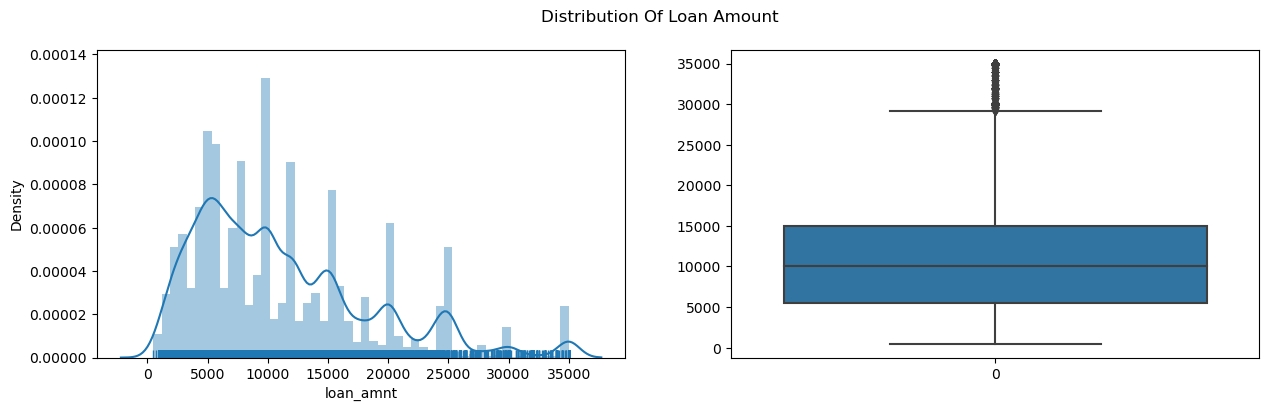

In [59]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.distplot(a=loan.loan_amnt, rug=True)
plt.subplot(1,2,2)
sns.boxplot(data=loan.loan_amnt)
plt.suptitle('Distribution Of Loan Amount')
plt.show()

In [60]:
loan.loan_amnt.describe()

count    36800.000000
mean     11149.540761
std       7369.855703
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

##### From above we derived 
- Amount of 10000 took by more number of people. 
- Very few people took loan amount of 30000. 
- The median loan amount is 10000

###  Univariate Analysis Funded Amount

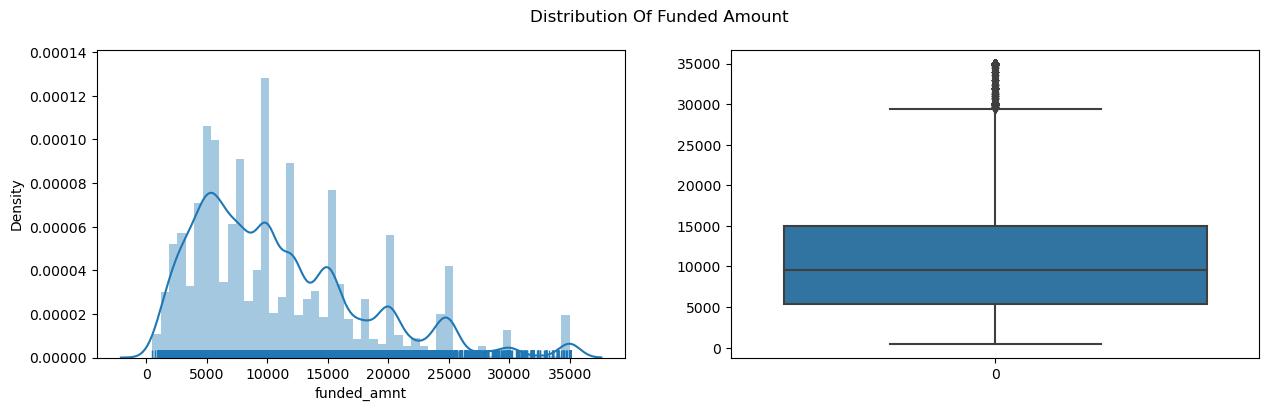

In [61]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.distplot(a=loan.funded_amnt, rug=True)
plt.subplot(1,2,2)
sns.boxplot(data=loan.funded_amnt)
plt.suptitle('Distribution Of Funded Amount')
plt.show()

In [62]:
loan.funded_amnt.describe()

count    36800.000000
mean     10880.794837
std       7109.157574
min        500.000000
25%       5400.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: funded_amnt, dtype: float64

##### From above we derived 
- The loan amount is nearly identical to the median loan funded amount, which stands at 9600.
- The lending club appears to have approved most of loan amount.

###  Univariate Analysis funded_amnt_inv

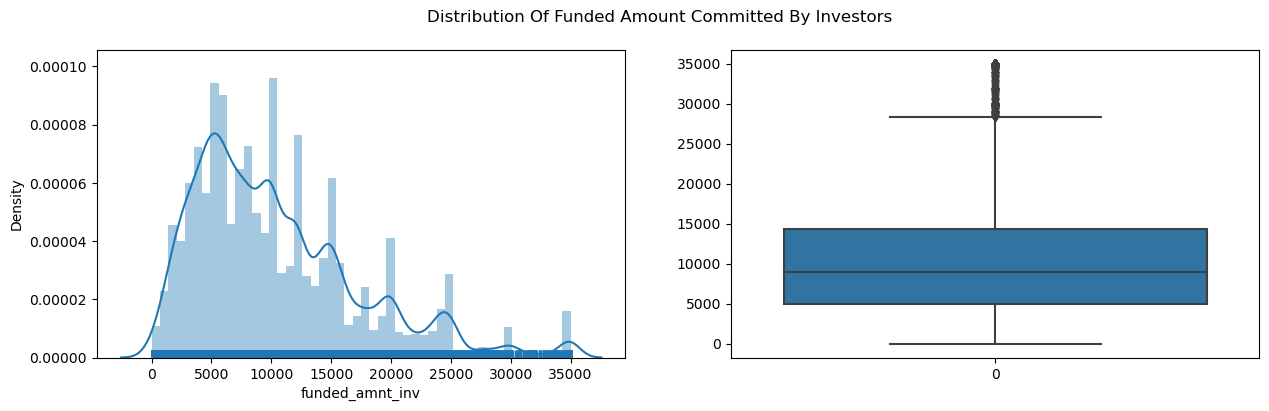

In [63]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.distplot(a=loan.funded_amnt_inv, rug=True)
plt.subplot(1,2,2)
sns.boxplot(data=loan.funded_amnt_inv)
plt.suptitle('Distribution Of Funded Amount Committed By Investors')
plt.show()

In [64]:
loan.funded_amnt_inv.describe()

count    36800.000000
mean     10439.055845
std       7008.522880
min          0.000000
25%       5000.000000
50%       9000.000000
75%      14350.000000
max      35000.000000
Name: funded_amnt_inv, dtype: float64

##### From above we derived 
- Investment data for the funded amount operates in a similar manner to the loan amount, indicating that Lending Club has approved the majority of the applied loan amount.

###  Univariate Analysis Of Interest Rate

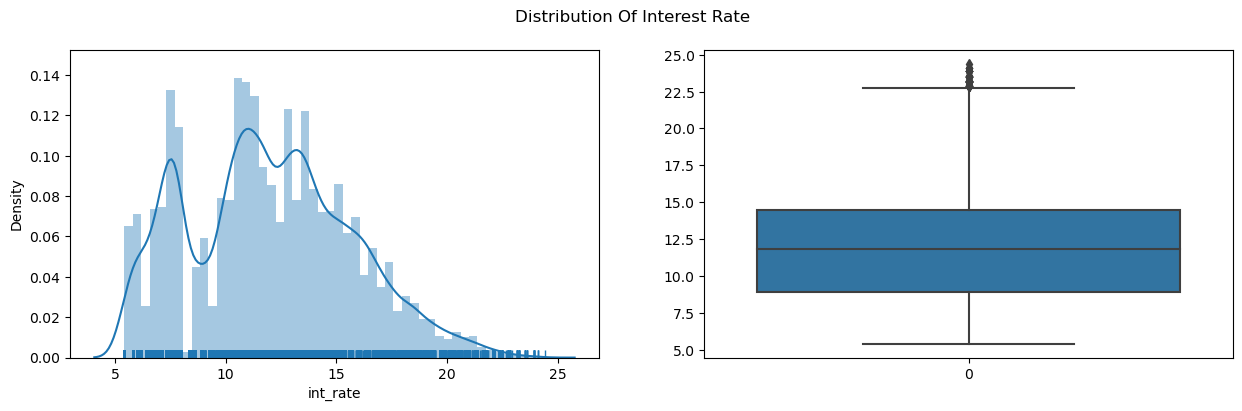

In [65]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.distplot(a=loan.int_rate, rug=True)
plt.subplot(1,2,2)
sns.boxplot(data=loan.int_rate)
plt.suptitle('Distribution Of Interest Rate')
plt.show()

In [66]:
loan.int_rate.describe()

count    36800.000000
mean        11.983745
std          3.701182
min          5.420000
25%          8.940000
50%         11.830000
75%         14.460000
max         24.400000
Name: int_rate, dtype: float64

##### From above we derived 
- The majority of interest rates fall within the range of 9% to 14.5%. However, there are individuals who have obtained loans at a higher interest rate of 22.5%.

###  Univariate Analysis Of Installment

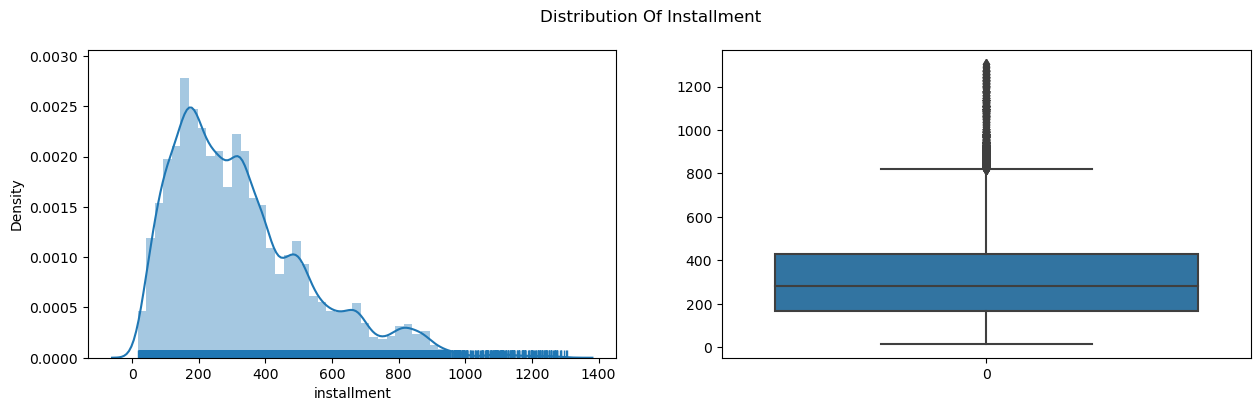

In [67]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.distplot(a=loan.installment, rug=True)
plt.subplot(1,2,2)
sns.boxplot(data=loan.installment)
plt.suptitle('Distribution Of Installment')
plt.show()

In [68]:
loan.installment.describe()

count    36800.000000
mean       324.906537
std        208.891979
min         16.080000
25%        167.730000
50%        280.110000
75%        429.365000
max       1305.190000
Name: installment, dtype: float64

##### From above we derived 
- The median value of installment amount in around 280.

###  Univariate Analysis Of Annual Income Reported By Applicant (annual_inc)

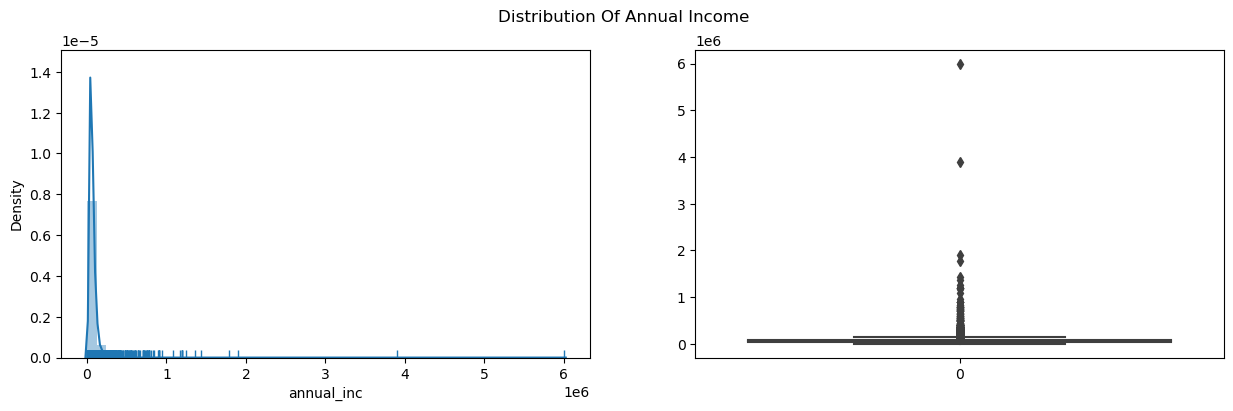

In [69]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.distplot(a=loan.annual_inc, rug=True)
plt.subplot(1,2,2)
sns.boxplot(data=loan.annual_inc)
plt.suptitle('Distribution Of Annual Income')
plt.show()

In [70]:
loan.annual_inc.describe()

count    3.680000e+04
mean     6.943448e+04
std      6.402159e+04
min      4.000000e+03
25%      4.113300e+04
50%      6.000000e+04
75%      8.300000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

##### From above we derived 
- The median annual income is 60000

###  Univariate Analysis Of Debt to Income Ratio (dti)

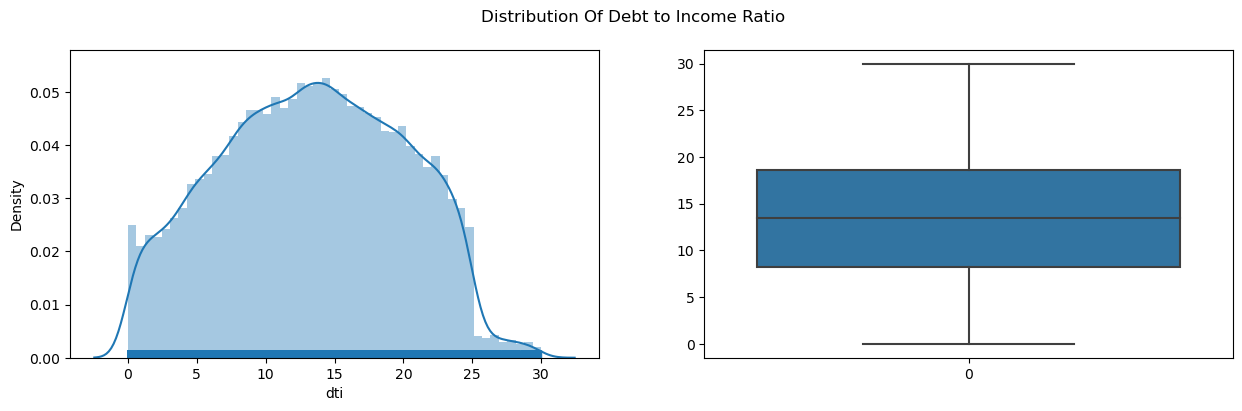

In [71]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.distplot(a=loan.dti, rug=True)
plt.subplot(1,2,2)
sns.boxplot(data=loan.dti)
plt.suptitle('Distribution Of Debt to Income Ratio')
plt.show()

In [72]:
loan.dti.describe()

count    36800.000000
mean        13.334529
std          6.650154
min          0.000000
25%          8.220000
50%         13.430000
75%         18.590000
max         29.990000
Name: dti, dtype: float64

##### From above we derived 
- It appears that there are no outliers present and the distribution closely resembles a normal distribution. 
- This is a positive indication that all the loans have been granted to borrowers with a Debt to Income ratio below 30.


###  Univariate Analysis Of Public Derogatory Records (pub_rec)

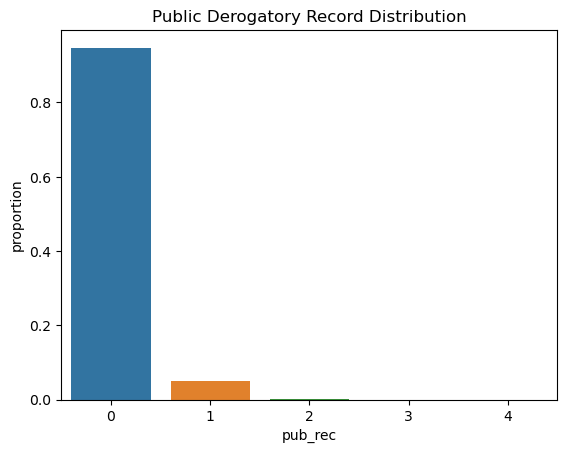

In [73]:
pub_df = loan['pub_rec'].value_counts(normalize=True).reset_index()
sns.barplot(x= 'pub_rec', y= 'proportion', data=pub_df)
plt.title('Public Derogatory Record Distribution')
plt.show()

##### From above we derived 
- Approximately 90% of borrowers do not have any public derogatory records.

###  Univariate Analysis Of Public Record Bankruptcies (pub_rec_bankruptcies)

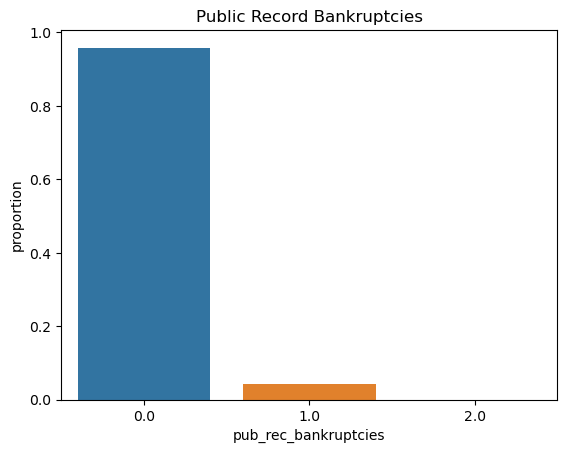

In [74]:
pub_df = loan['pub_rec_bankruptcies'].value_counts(normalize=True).reset_index()
sns.barplot(x= 'pub_rec_bankruptcies', y= 'proportion', data=pub_df)
plt.title('Public Record Bankruptcies')
plt.show()

##### From above we derived 
- Approximately 99% of borrowers did not went into bankruptcies

###  Univariate Analysis Of  Loan Issue Year and Loan Issue Month

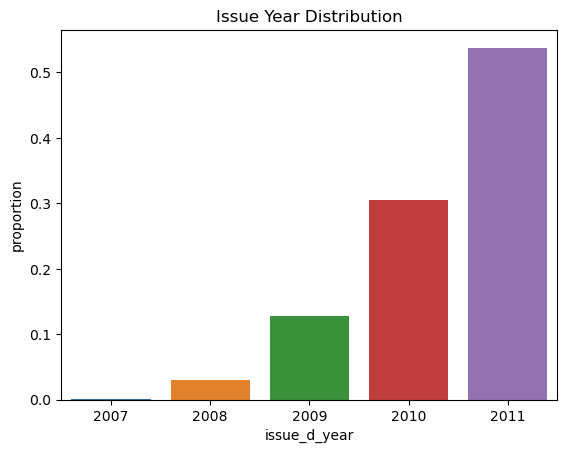

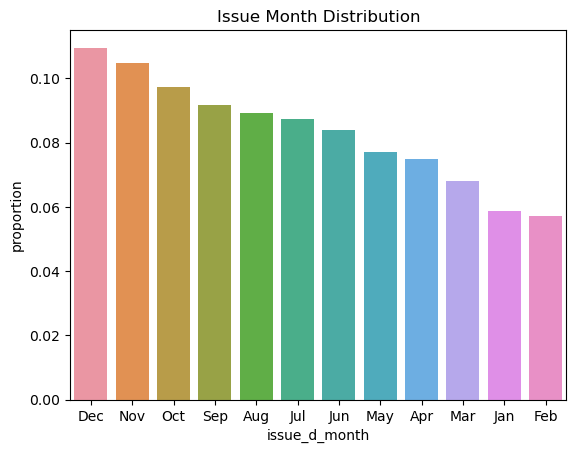

In [75]:
pub_df_year = loan['issue_d_year'].value_counts(normalize=True).reset_index()
sns.barplot(x= 'issue_d_year', y= 'proportion', data=pub_df_year)
plt.title('Issue Year Distribution')
plt.show()

pub_df_month = loan['issue_d_month'].value_counts(normalize=True).reset_index()
sns.barplot(x= 'issue_d_month', y= 'proportion', data=pub_df_month)
plt.title('Issue Month Distribution')
plt.show()

##### From above we derived 
- The lending club experiences a doubling of loan issues annually.
- The majority of loans have been approved during the months of October, November, and December.
- The approval of loans has witnessed a rise from March to December.

###  Univariate Analysis Of Earliest Reported Credit Line(earliest_cr_line)

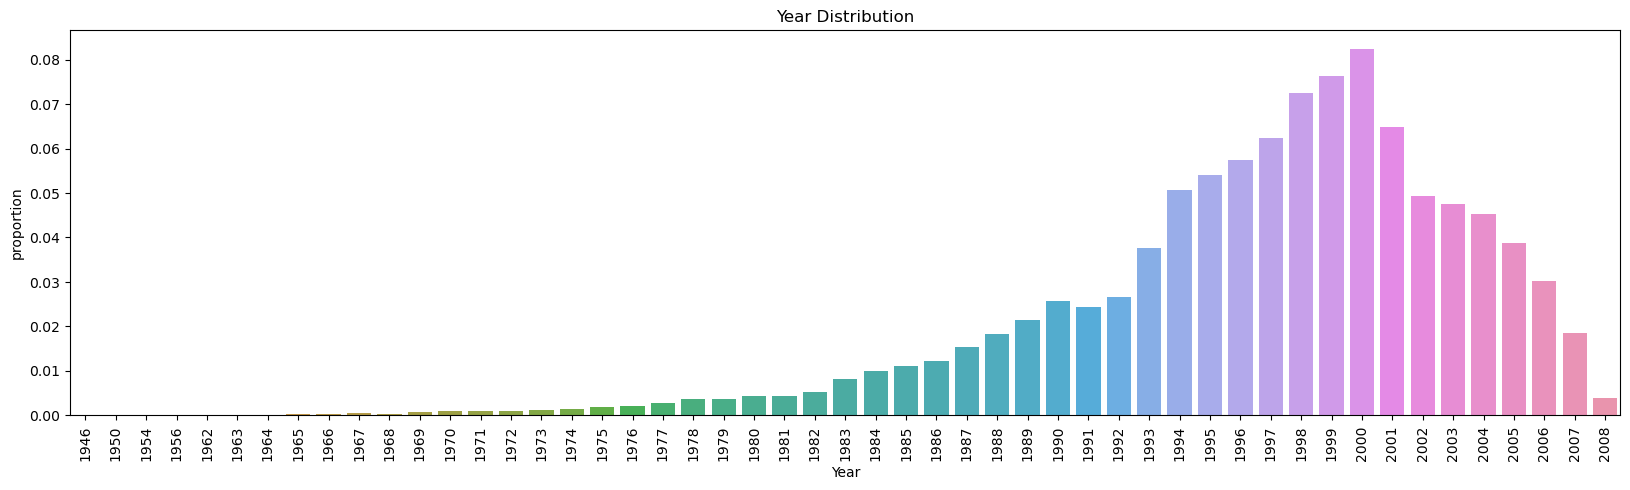

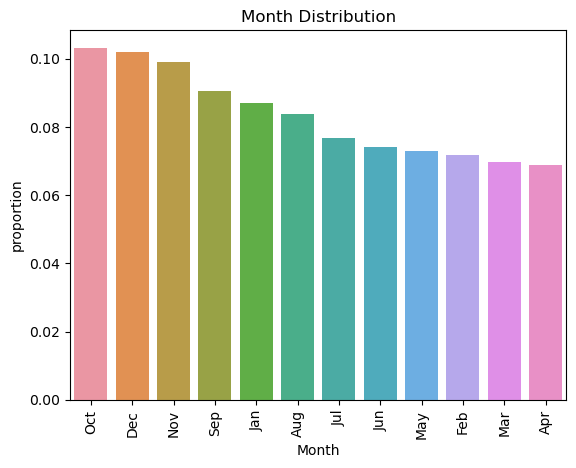

In [76]:
plt.figure(figsize=(20,5))
pub_df_year = loan['earliest_cr_line_year'].value_counts(normalize=True).reset_index()
sns.barplot(x= 'earliest_cr_line_year', y= 'proportion', data=pub_df_year)
plt.title('Year Distribution')
plt.xticks(rotation=90)
plt.xlabel('Year')
plt.show()

pub_df_month = loan['earliest_cr_line_month'].value_counts(normalize=True).reset_index()
sns.barplot(x= 'earliest_cr_line_month', y= 'proportion', data=pub_df_month)
plt.title('Month Distribution')
plt.xticks(rotation=90)
plt.xlabel('Month')
plt.show()

##### From above we derived 
- A significant number of Lending Clubs loan borrowers obtained their credit lines in the year 2000, while the majority acquired their credit lines towards the end of the year, specifically in October, November, or December.


### Analysis Of Term

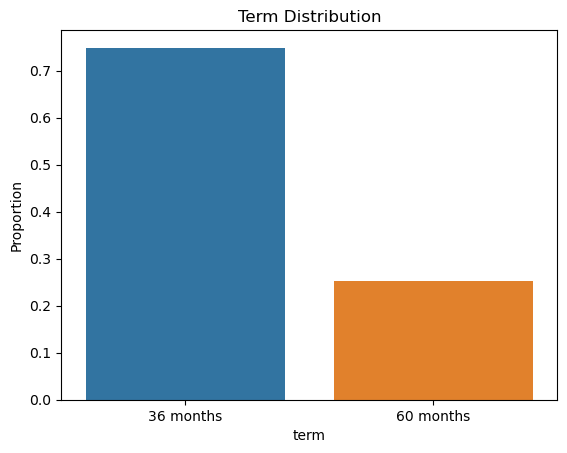

In [77]:
prob_df = loan['term'].value_counts(normalize=True).reset_index()
sns.barplot(x='term', y='proportion', data=prob_df)
plt.xlabel('term')
plt.ylabel('Proportion')
plt.title('Term Distribution')
plt.show()

##### From above we derived 
- Borrowers have opted for a tenure of 36 months, than the 60-month tenure.

### Analysis Of Grade

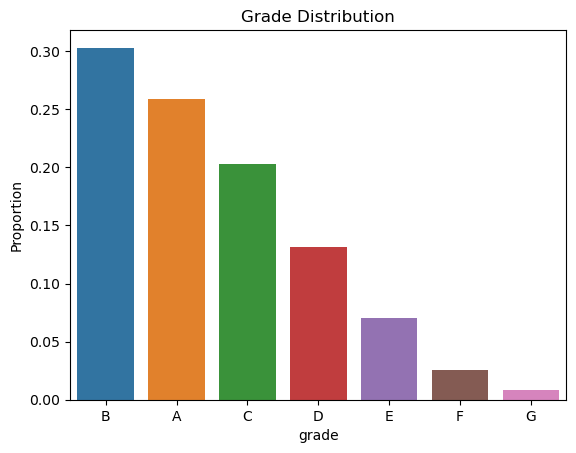

In [78]:
prob_df = loan['grade'].value_counts(normalize=True).reset_index()
sns.barplot(x='grade', y='proportion', data=prob_df)
plt.xlabel('grade')
plt.ylabel('Proportion')
plt.title('Grade Distribution')
plt.show()

##### From above we derived 
- Most borrowers falls under grade of 'A' and 'B'

### Analysis Of Sub Grade

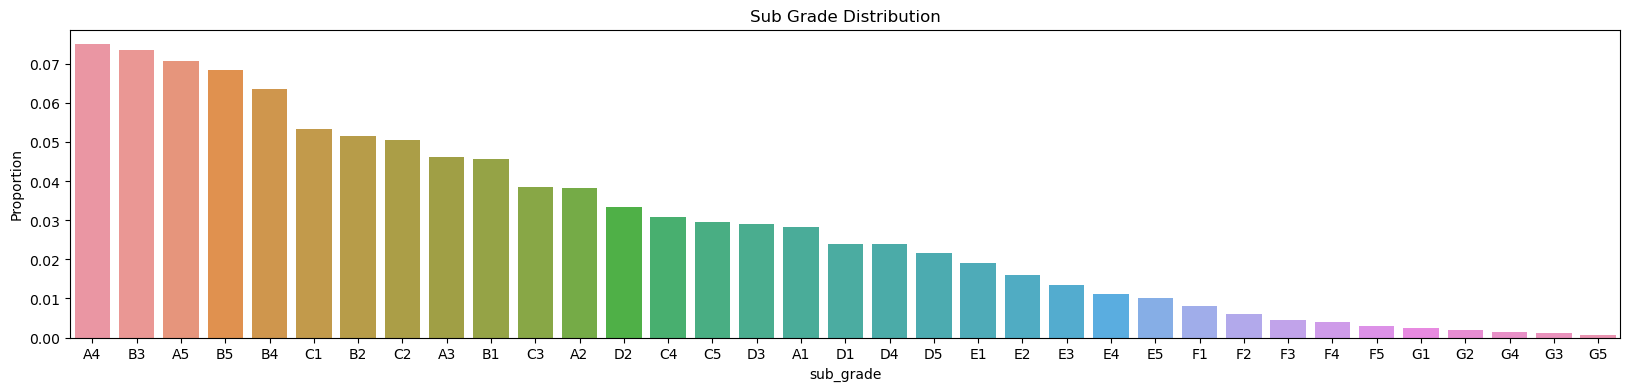

In [79]:
plt.figure(figsize=(20,4))
prob_df = loan['sub_grade'].value_counts(normalize=True).reset_index()
sns.barplot(x='sub_grade', y='proportion', data=prob_df)
plt.xlabel('sub_grade')
plt.ylabel('Proportion')
plt.title('Sub Grade Distribution')
plt.show()

##### From above we derived 
- Most borrowers falls under sub grade of 'A4' and 'B3'

### Analysis Of Employee Length

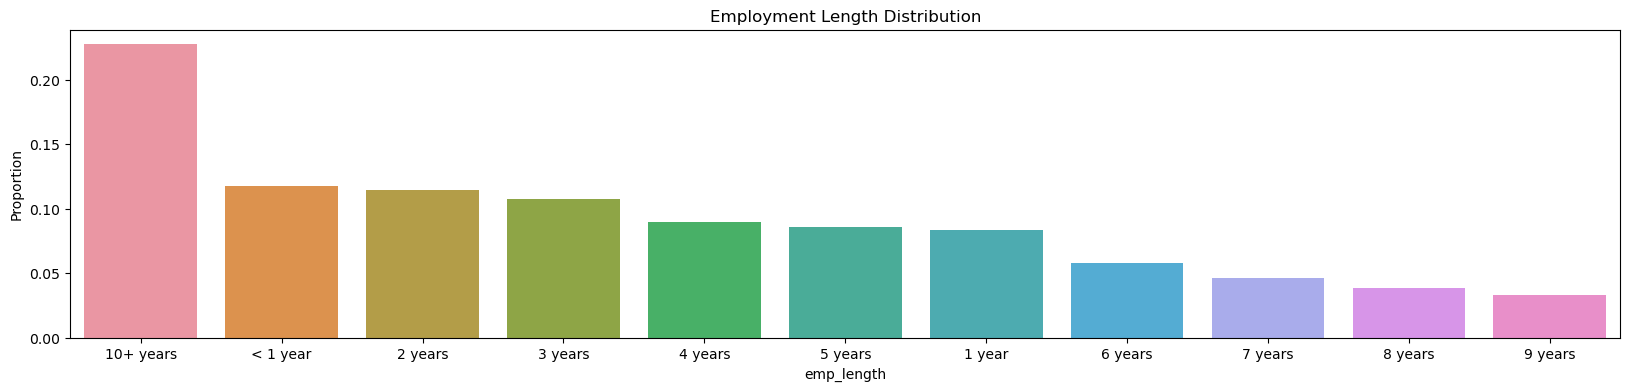

In [80]:
plt.figure(figsize=(20,4))
prob_df = loan['emp_length'].value_counts(normalize=True).reset_index()
sns.barplot(x='emp_length', y='proportion', data=prob_df)
plt.xlabel('emp_length')
plt.ylabel('Proportion')
plt.title('Employment Length Distribution')
plt.show()

##### From above we derived 
- Most borrowers falls under emplloyee length of 10+ year

### Analysis Of Home Ownership

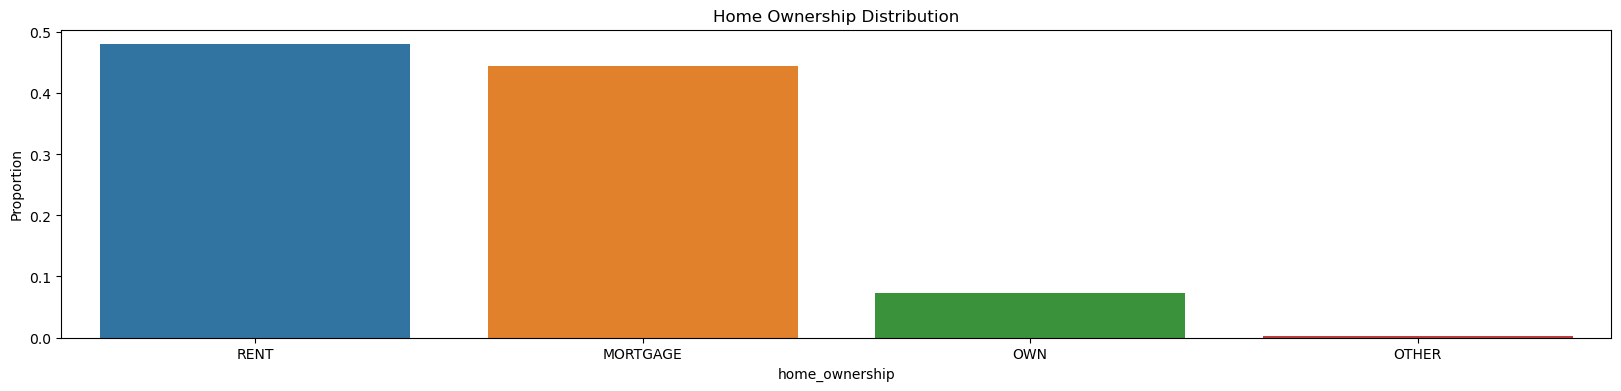

In [81]:
plt.figure(figsize=(20,4))
prob_df = loan['home_ownership'].value_counts(normalize=True).reset_index()
sns.barplot(x='home_ownership', y='proportion', data=prob_df)
plt.xlabel('home_ownership')
plt.ylabel('Proportion')
plt.title('Home Ownership Distribution')
plt.show()

##### From above we derived 
- Most borrowers have "Rent" or "Mortgage" houses

### Analysis Of Verification Status

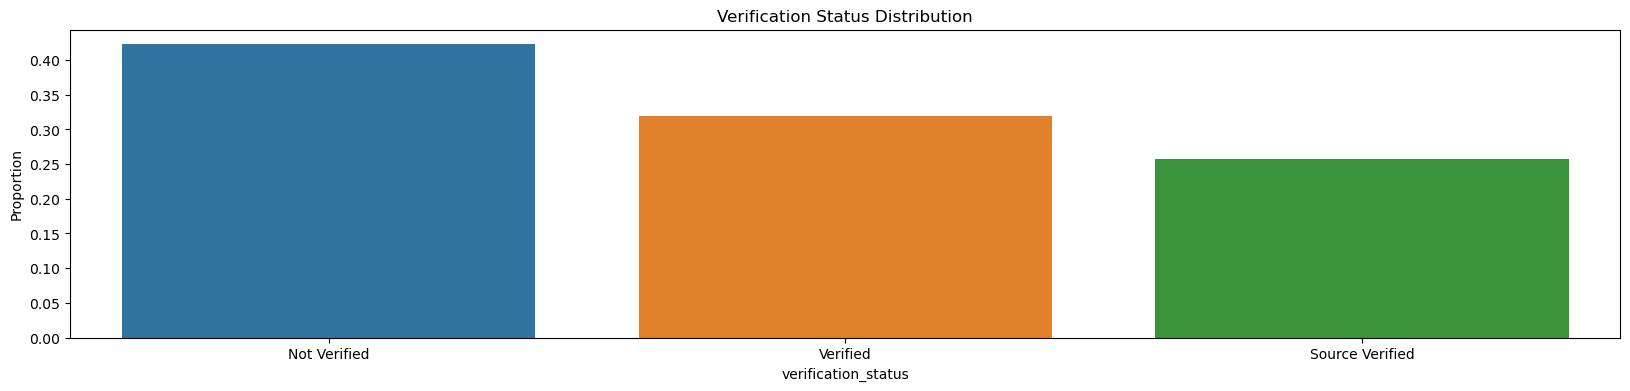

In [82]:
plt.figure(figsize=(20,4))
prob_df = loan['verification_status'].value_counts(normalize=True).reset_index()
sns.barplot(x='verification_status', y='proportion', data=prob_df)
plt.xlabel('verification_status')
plt.ylabel('Proportion')
plt.title('Verification Status Distribution')
plt.show()

##### From above we derived 
- Most of loan given without verification

### Analysis Of Loan Status

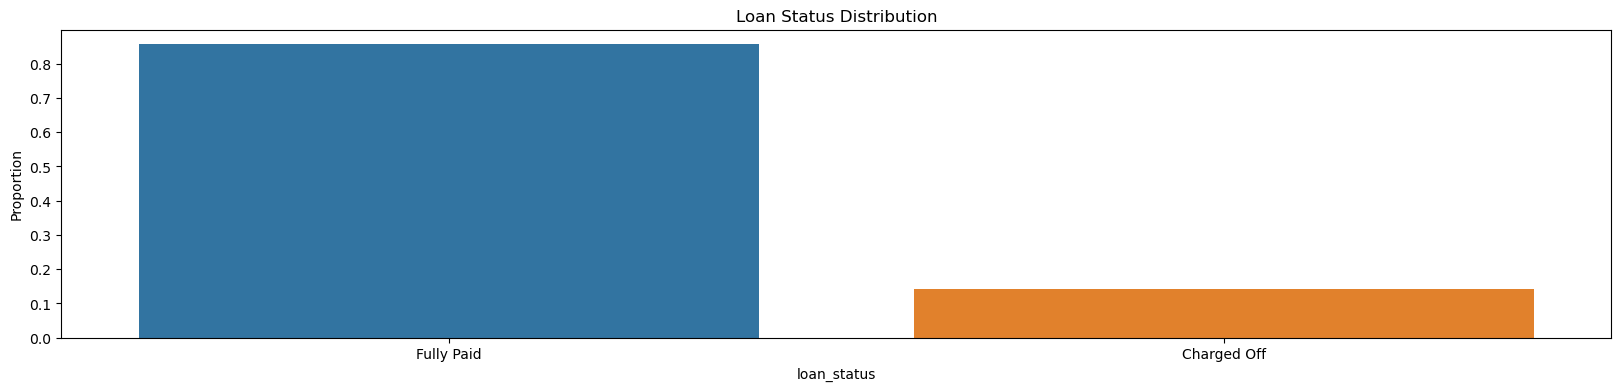

In [83]:
plt.figure(figsize=(20,4))
prob_df = loan['loan_status'].value_counts(normalize=True).reset_index()
sns.barplot(x='loan_status', y='proportion', data=prob_df)
plt.xlabel('loan_status')
plt.ylabel('Proportion')
plt.title('Loan Status Distribution')
plt.show()

##### From above we derived 
- More than 80% of borrowers has paid the loan fully.

### Analysis Of Purpose

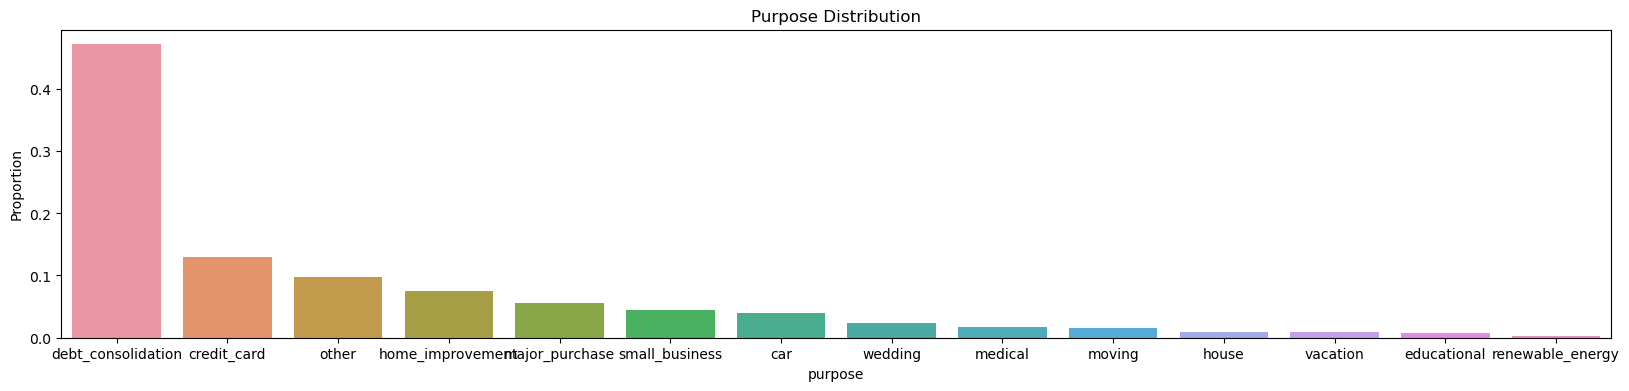

In [84]:
plt.figure(figsize=(20,4))
prob_df = loan['purpose'].value_counts(normalize=True).reset_index()
sns.barplot(x='purpose', y='proportion', data=prob_df)
plt.xlabel('purpose')
plt.ylabel('Proportion')
plt.title('Purpose Distribution')
plt.show()

##### From above we derived 
- It appears that a greater number of individuals opted to take out loans for debt consolidation, while only a small minority chose to do so for renewable energy.


### Analysis Of Borrower's State (add_state)

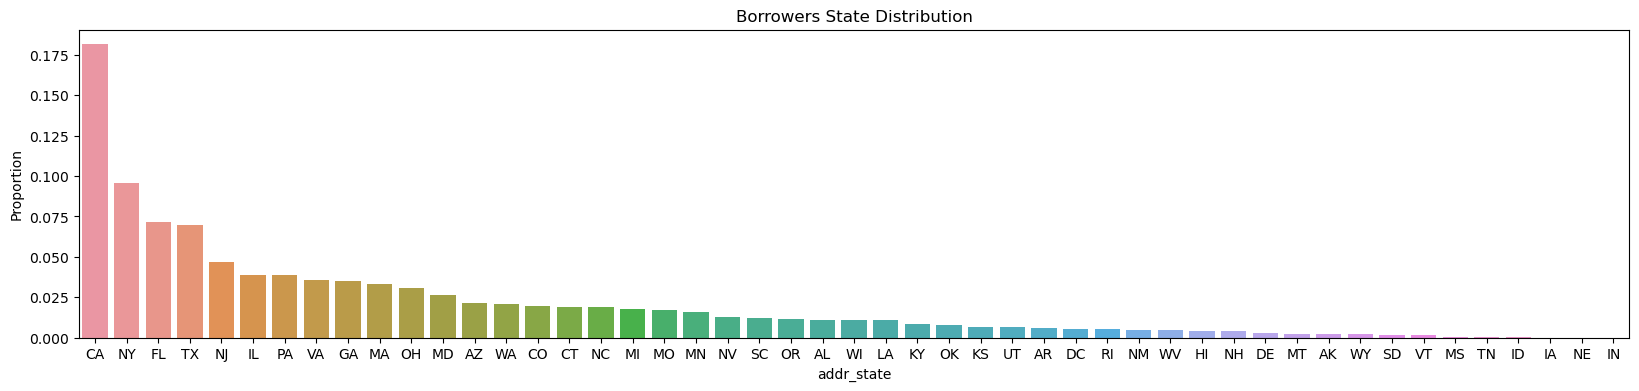

In [85]:
plt.figure(figsize=(20,4))
prob_df = loan['addr_state'].value_counts(normalize=True).reset_index()
sns.barplot(x='addr_state', y='proportion', data=prob_df)
plt.xlabel('addr_state')
plt.ylabel('Proportion')
plt.title('Borrowers State Distribution')
plt.show()

##### From above we derived 
- Majority of the borrowers are from CA and NY

In [86]:
loan.head()

,id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_pymnt,total_pymnt_inv,last_pymnt_amnt,pub_rec_bankruptcies,issue_d_year,issue_d_month,earliest_cr_line_year,earliest_cr_line_month
0,1077501,5000,5000,4975.0,36 months,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-2011,Fully Paid,credit_card,860xx,AZ,27.65,0,Jan-1985,1,3,0,13648,83.7,9,5863.155187,5833.84,171.62,0.0,2011,Dec,1985,Jan
1,1077430,2500,2500,2500.0,60 months,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-2011,Charged Off,car,309xx,GA,1.00,0,Apr-1999,5,3,0,1687,9.4,4,1008.710000,1008.71,119.66,0.0,2011,Dec,1999,Apr
2,1077175,2400,2400,2400.0,36 months,15.96,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-2011,Fully Paid,small_business,606xx,IL,8.72,0,Nov-2001,2,2,0,2956,98.5,10,3005.666844,3005.67,649.91,0.0,2011,Dec,2001,Nov
3,1076863,10000,10000,10000.0,36 months,13.49,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,Dec-2011,Fully Paid,other,917xx,CA,20.00,0,Feb-1996,1,10,0,5598,21.0,37,12231.890000,12231.89,357.48,0.0,2011,Dec,1996,Feb
5,1075269,5000,5000,5000.0,36 months,7.90,156.46,A,A4,3 years,RENT,36000.0,Source Verified,Dec-2011,Fully Paid,wedding,852xx,AZ,11.20,0,Nov-2004,3,9,0,7963,28.3,12,5632.210000,5632.21,161.03,0.0,2011,Dec,2004,Nov


# Segmented Univariate Analysis

# Loan Amount

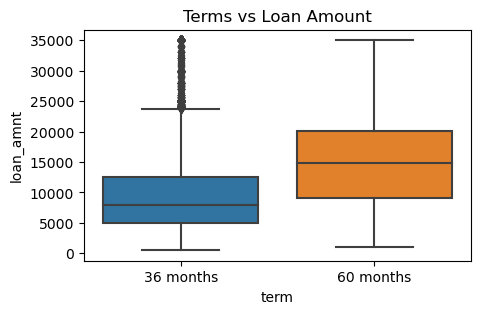

In [87]:
plt.figure(figsize=(5,3))
sns.boxplot(x='term', y=loan.loan_amnt, data=loan)
plt.title('Terms vs Loan Amount')
plt.show()

##### From above we derived 
- The greater term the loan, the larger the amount.

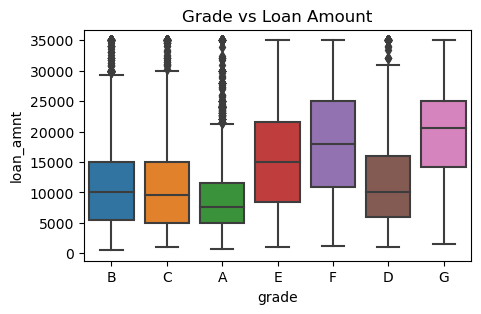

In [88]:
plt.figure(figsize=(5,3))
sns.boxplot(x='grade', y=loan.loan_amnt, data=loan)
plt.title('Grade vs Loan Amount')
plt.show()

##### From above we derived 
- The majority of loan amount have been taken by employees graded as 'E' and 'F'.

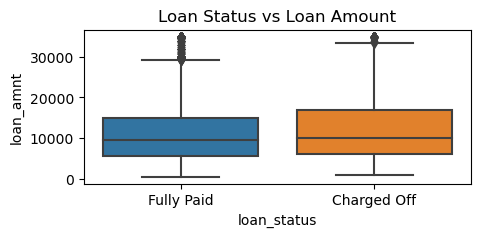

In [89]:
plt.figure(figsize=(5,2))
sns.boxplot(x='loan_status', y=loan.loan_amnt, data=loan)
plt.title('Loan Status vs Loan Amount')
plt.show()

##### From above we derived 
- Charged off loan are higer than fully paid

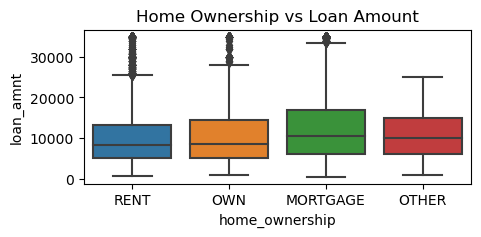

In [90]:
plt.figure(figsize=(5,2))
sns.boxplot(x='home_ownership', y=loan.loan_amnt, data=loan)
plt.title('Home Ownership vs Loan Amount')
plt.show()

##### From above we derived 
- Mortgage loan are higher than other loans and median is higher than other loans as well.

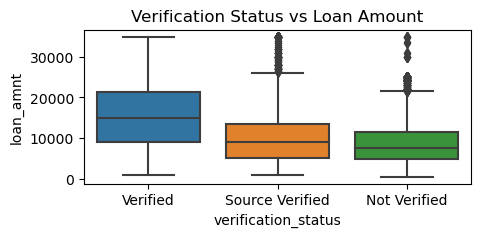

In [91]:
plt.figure(figsize=(5,2))
sns.boxplot(x='verification_status', y=loan.loan_amnt, data=loan)
plt.title('Verification Status vs Loan Amount')
plt.show()

##### From above we observed 
- Most of borrower are verified

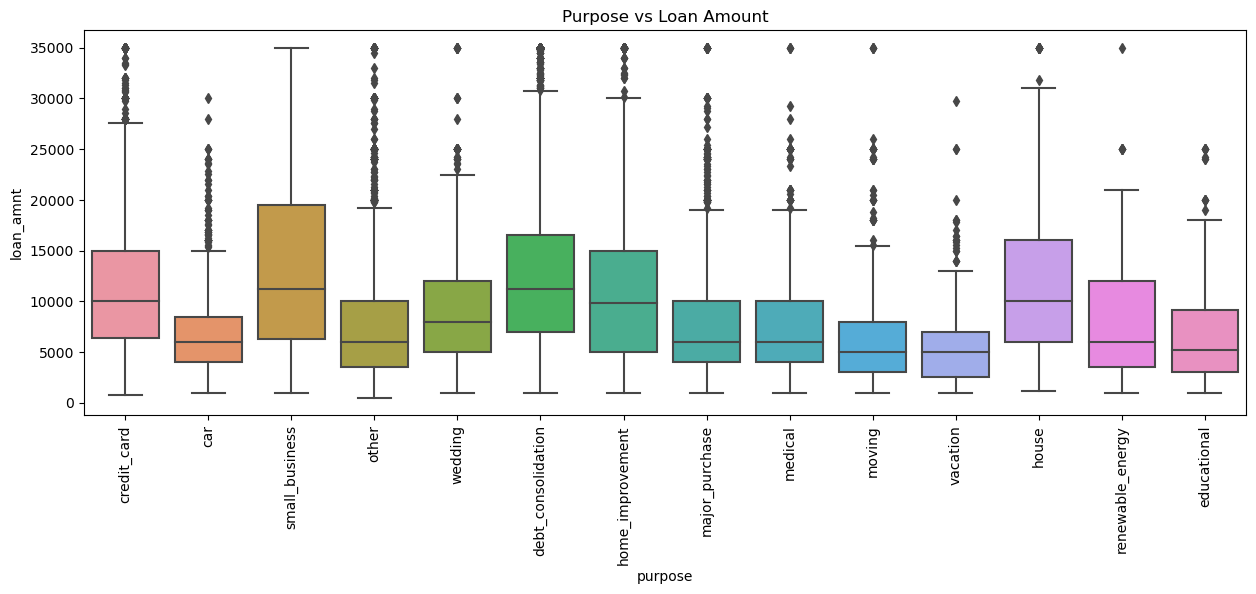

In [92]:
plt.figure(figsize=(15,5))
sns.boxplot(x='purpose', y=loan.loan_amnt, data=loan)
plt.xticks(rotation=90)
plt.title('Purpose vs Loan Amount')
plt.show()

##### From above we observed 
- More loans are for small_business

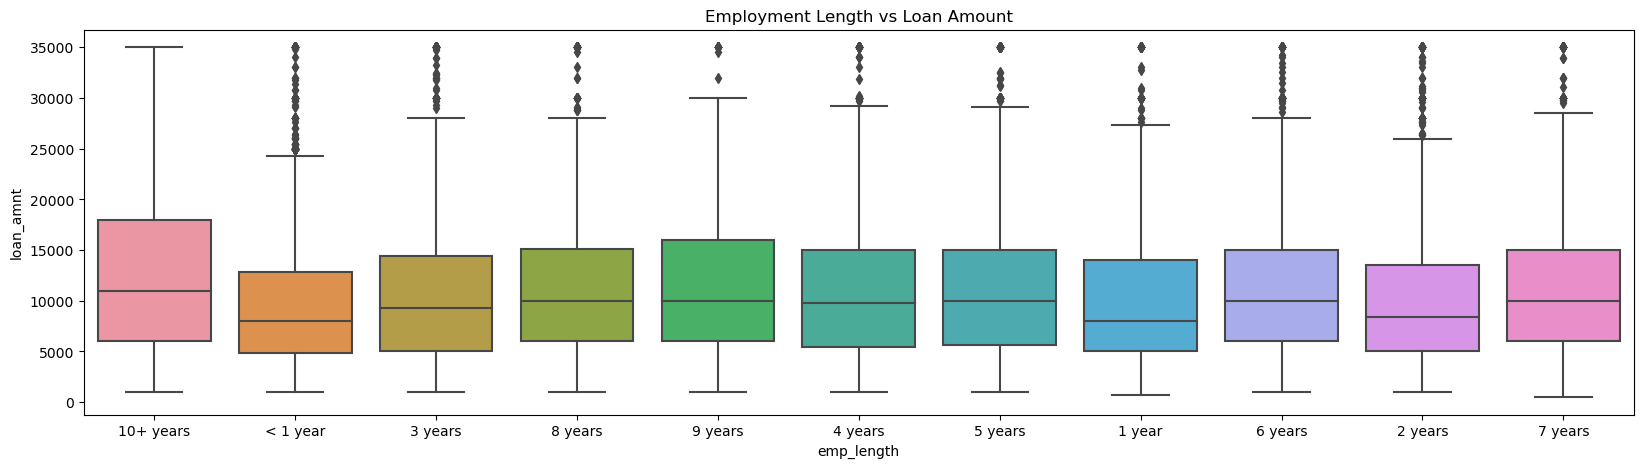

In [93]:
plt.figure(figsize=(20,5))
sns.boxplot(x='emp_length', y=loan.loan_amnt, data=loan)
plt.title('Employment Length vs Loan Amount')
plt.show()

##### From above we observed 
- Mor borrowers are from 10+ years and least is less 1 year

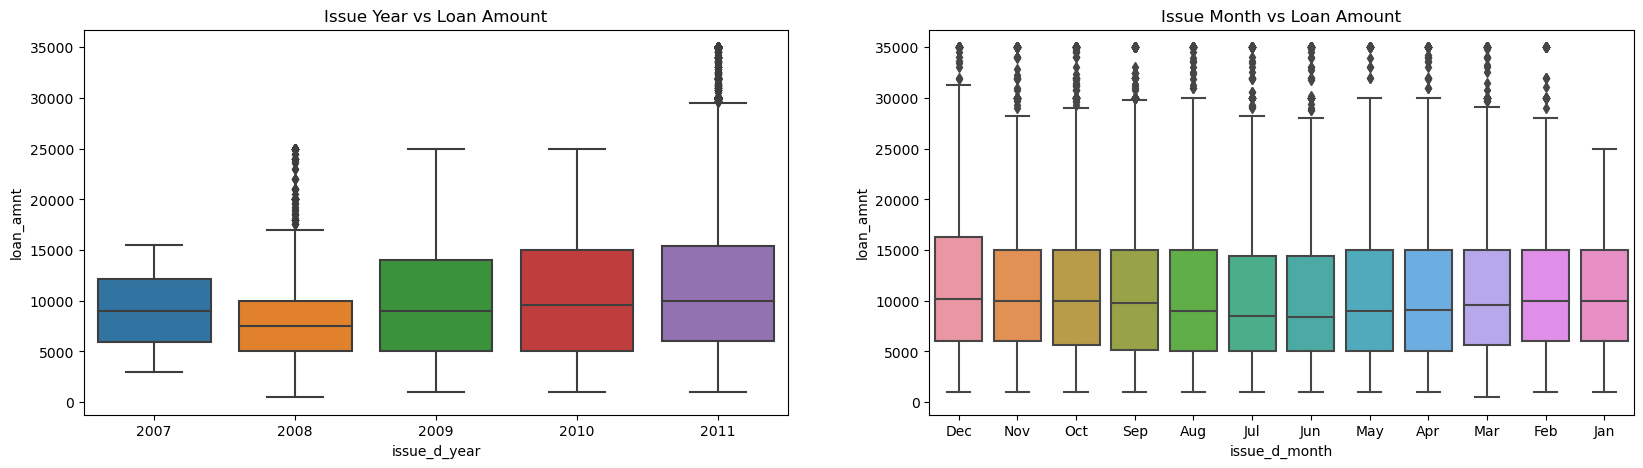

In [94]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x=loan.issue_d_year, y=loan.loan_amnt, data=loan)
plt.title('Issue Year vs Loan Amount')
plt.subplot(122)
sns.boxplot(x=loan.issue_d_month, y=loan.loan_amnt, data=loan)
plt.title('Issue Month vs Loan Amount')
plt.show()

##### From above we observed 

- There were a few loan borrowers who obtained higher loan amounts in both 2008 and 2011, and these instances have been identified as outliers in the data.
- In all the months, loan borrowers have availed nearly identical amounts, with the exception of December, where individuals have obtained larger sums due to a significantly higher distribution above the median.

# Interest Rate

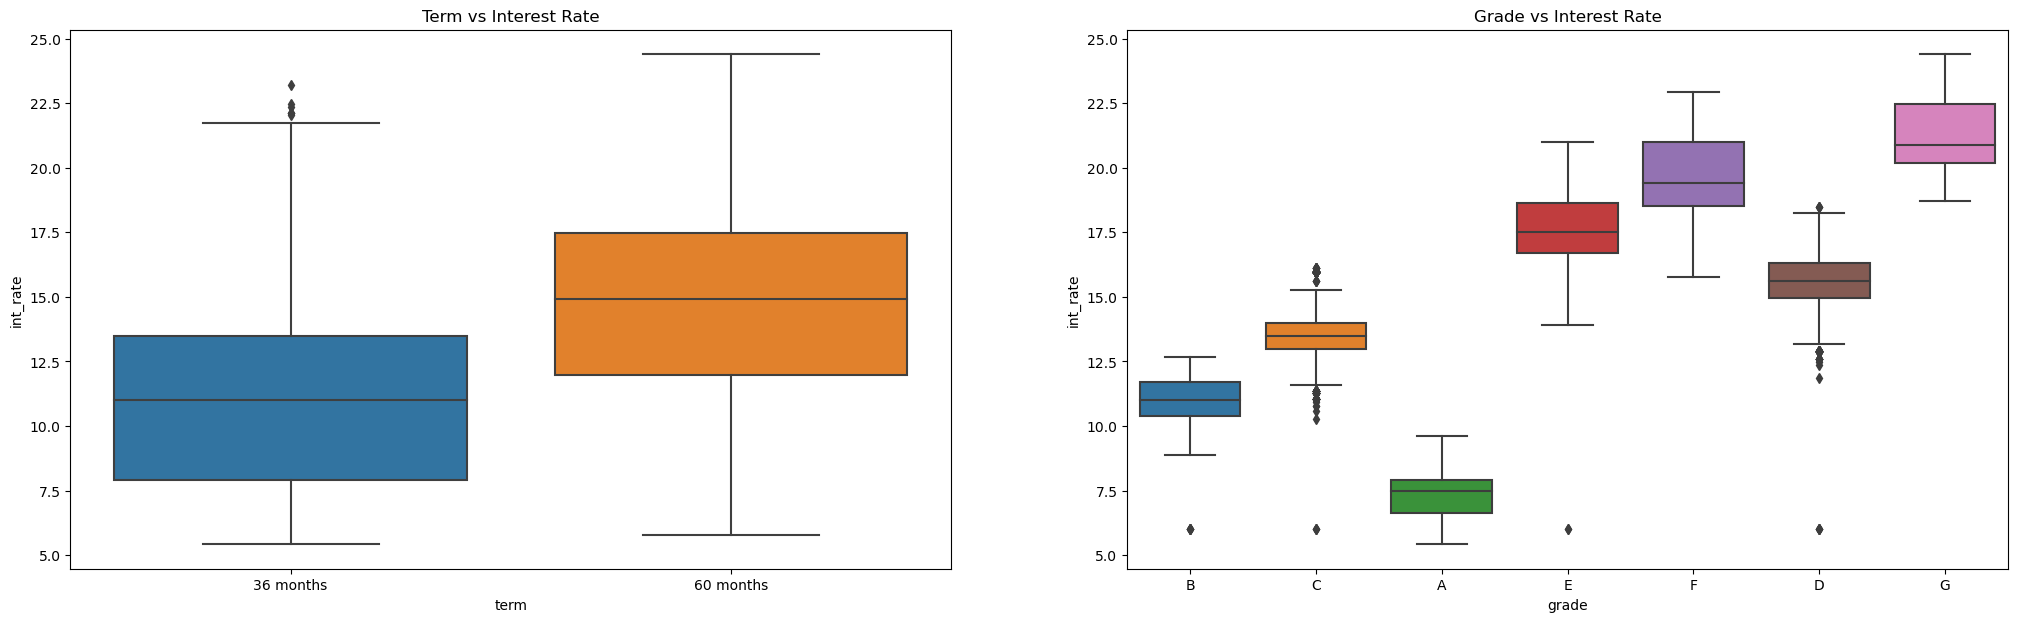

In [95]:
plt.figure(figsize=(25,7))
plt.subplot(121)
sns.boxplot(x='term', y=loan.int_rate, data=loan)
plt.title('Term vs Interest Rate')
plt.subplot(122)
plt.title('Grade vs Interest Rate')
sns.boxplot(x='grade', y=loan.int_rate, order = (loan.grade.unique()).sort(), data=loan)
plt.show()

##### From above we observed
- The interest rates for loans with longer tenures are higher.
- The lower grades has higher interest reate

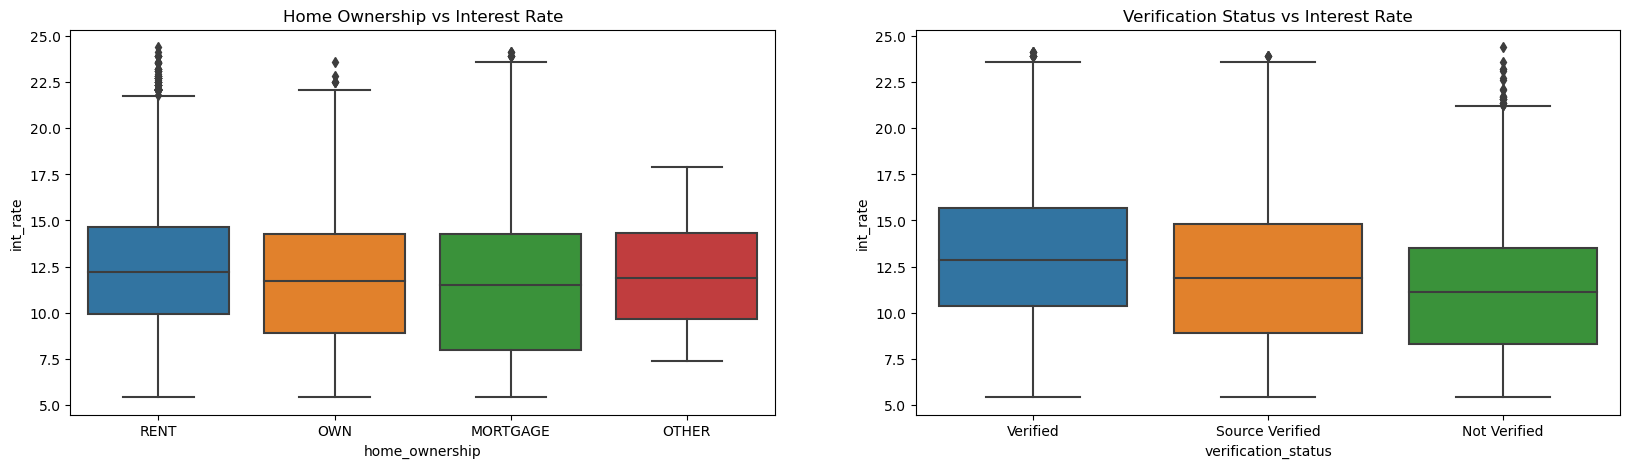

In [96]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='home_ownership', y=loan.int_rate, data=loan)
plt.title('Home Ownership vs Interest Rate')
plt.subplot(122)
plt.title('Verification Status vs Interest Rate')
sns.boxplot(x='verification_status', y=loan.int_rate, order = (loan.verification_status.unique()).sort(), data=loan)
plt.show()

##### From above we observed
- Non-verified borrowers receive lower interest rates in comparison to verified and source-verified borrowers.
- Borrowers with Own and Mortgage got loans with less interest rates as the security will be there.

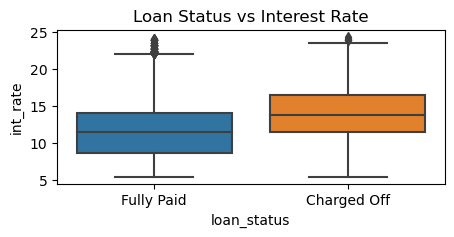

In [97]:
plt.figure(figsize=(5,2))
sns.boxplot(x='loan_status', y=loan.int_rate, data=loan)
plt.title('Loan Status vs Interest Rate')
plt.show()

##### From above we observed
- It indicates that the higher the interest rate, the greater the chance of loan default.

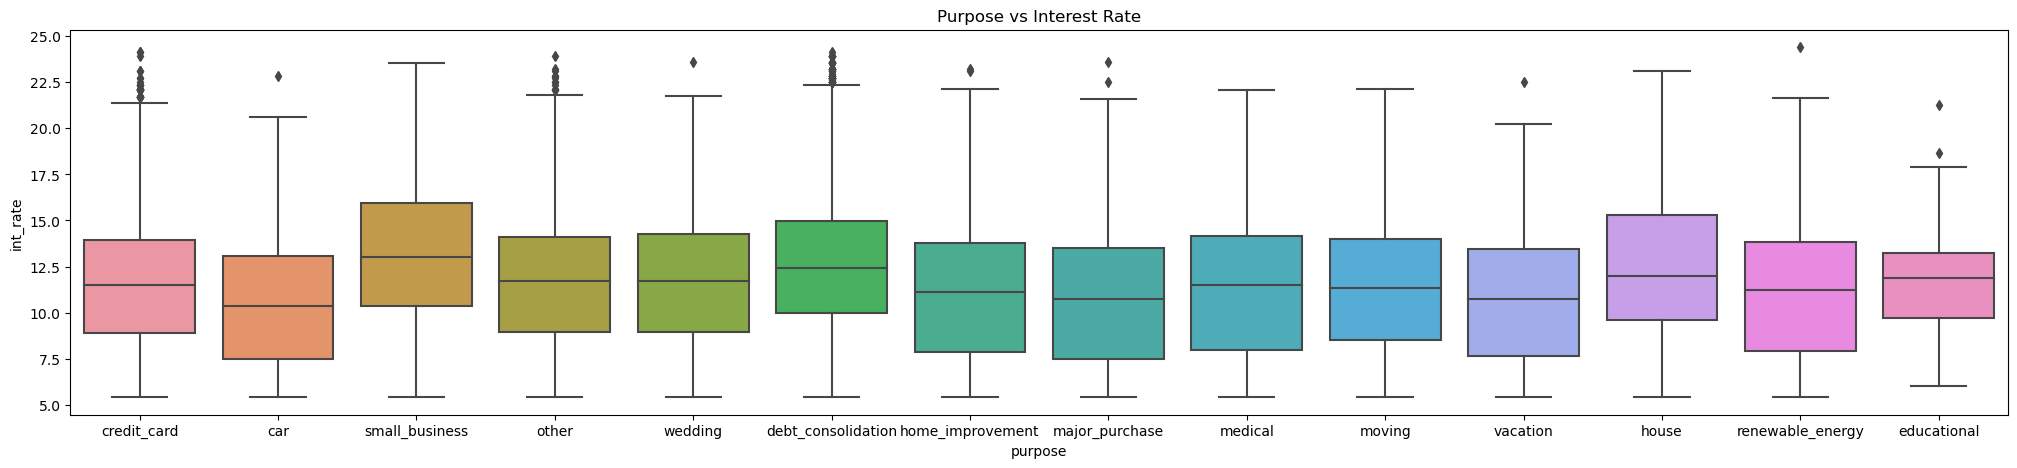

In [98]:
plt.figure(figsize=(25,5))
sns.boxplot(x='purpose', y=loan.int_rate, data=loan)
plt.title('Purpose vs Interest Rate')
plt.show()

##### From above we observed
- Small business, house, debt has more intererst rate than others

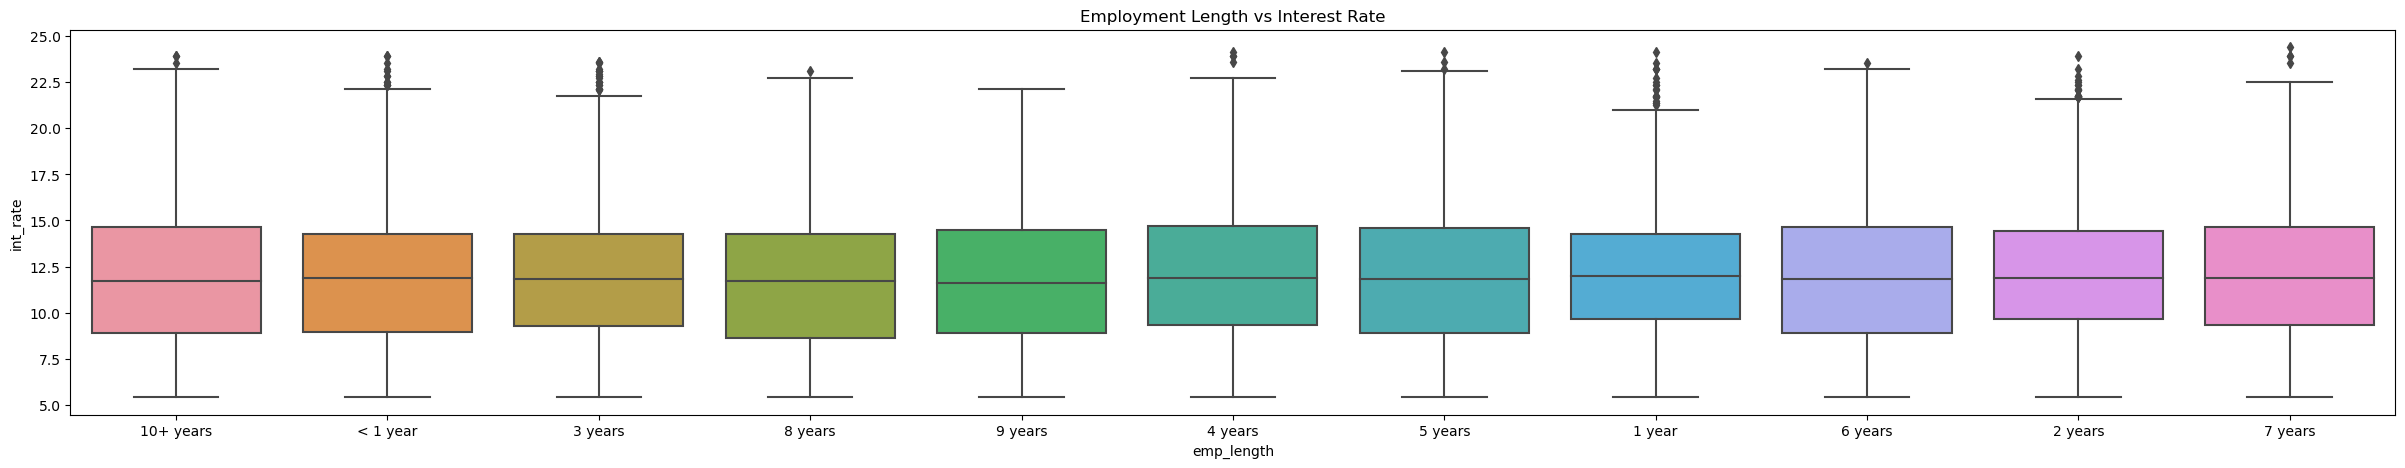

In [99]:
plt.figure(figsize=(30,5))
sns.boxplot(x='emp_length', y=loan.int_rate, data=loan)
plt.title('Employment Length vs Interest Rate')
plt.show()

##### From above we observed
- There is not much relation between employment length and interest rate

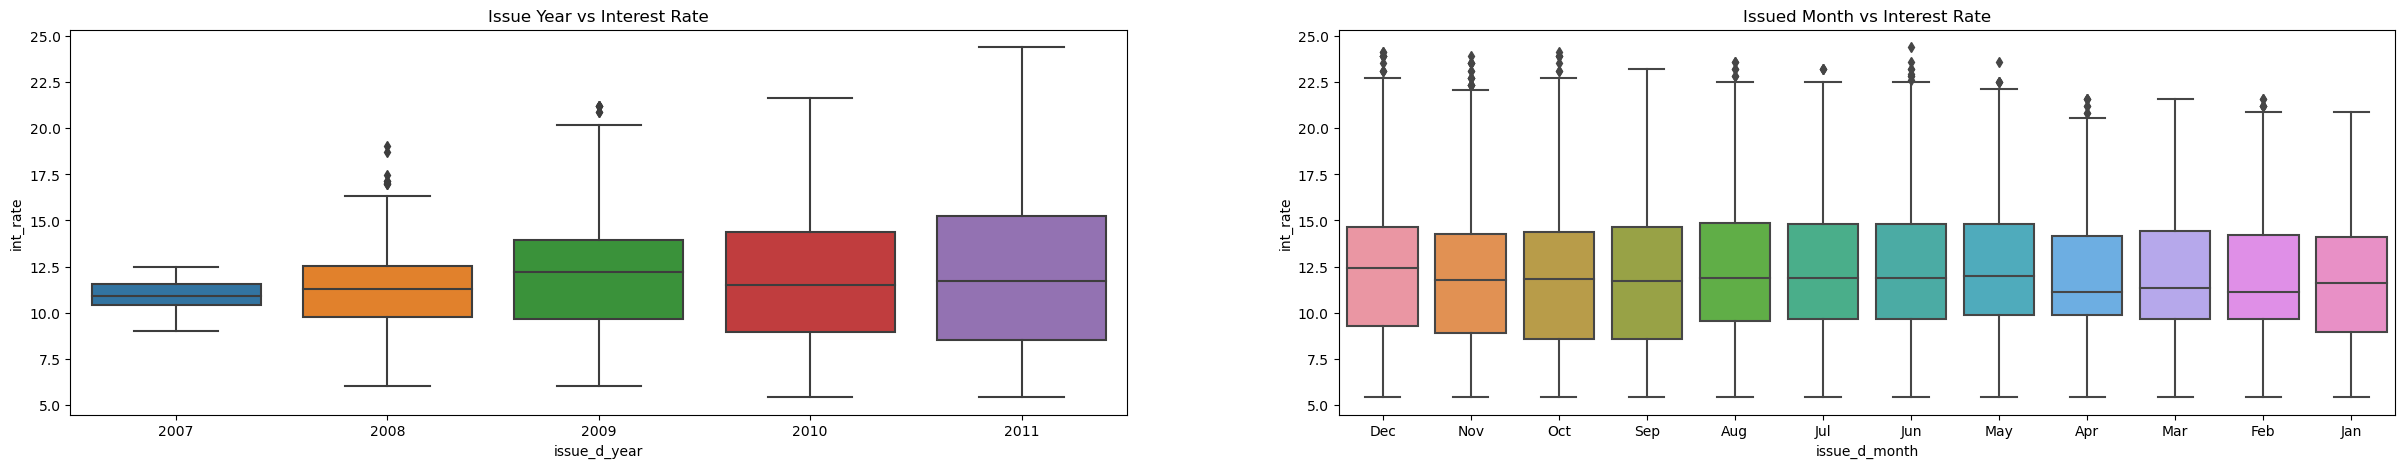

In [100]:
plt.figure(figsize=(30,5))
plt.subplot(121)
sns.boxplot(x=loan.issue_d_year, y=loan.int_rate, data=loan)
plt.title('Issue Year vs Interest Rate')
plt.subplot(122)
sns.boxplot(x=loan.issue_d_month, y=loan.int_rate, data=loan)
plt.title('Issued Month vs Interest Rate')
plt.show()

##### From above we observed
- The median interest rate is same in all years except 2009.

# Annual Income

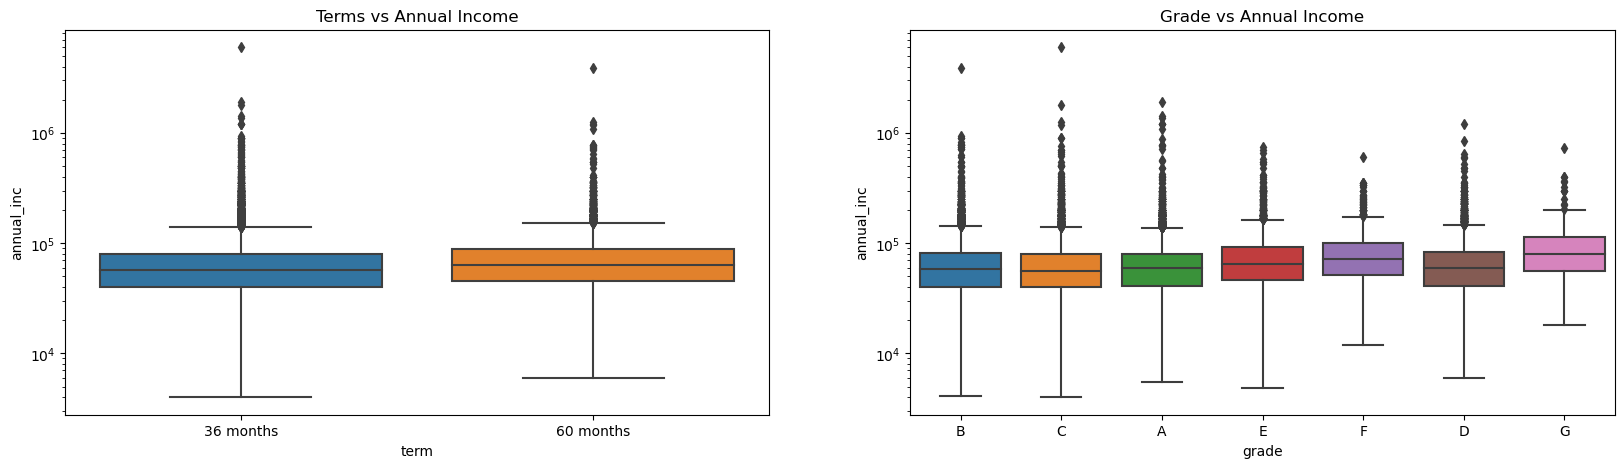

In [101]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='term', y=loan.annual_inc, data=loan)
plt.title('Terms vs Annual Income')
plt.yscale('log')
plt.subplot(122)
plt.title('Grade vs Annual Income')
sns.boxplot(x='grade', y=loan.annual_inc, data=loan)
plt.yscale('log')
plt.show()

##### From above we observed
- Lower grades tend to have a higher annual income compared to other grades.

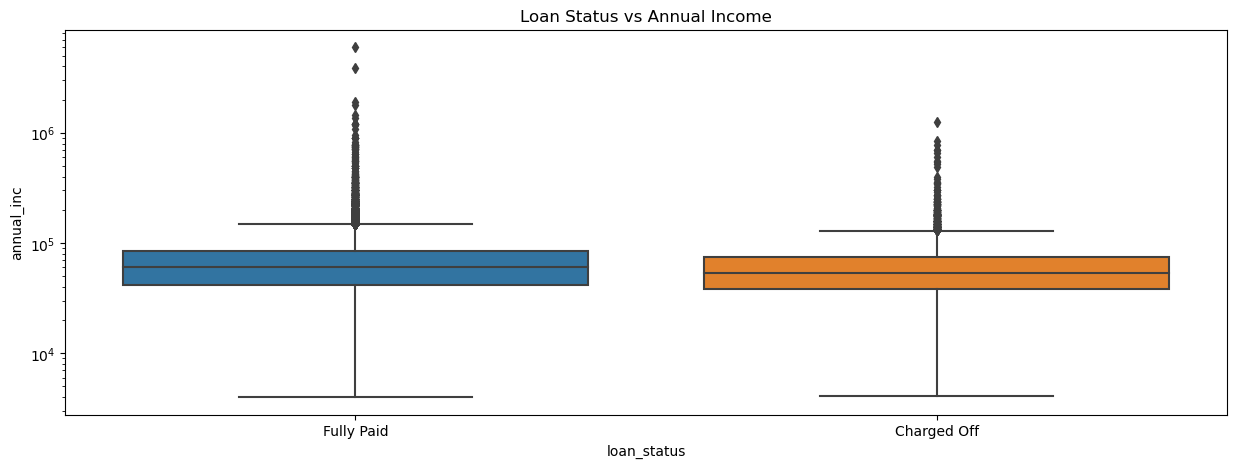

In [102]:
plt.figure(figsize=(15,5))
sns.boxplot(x='loan_status', y=loan.annual_inc, data=loan)
plt.title('Loan Status vs Annual Income')
plt.yscale('log')

##### From above we observed
- Most borrowers with higher annual incomes have "fully paid" off their loans.

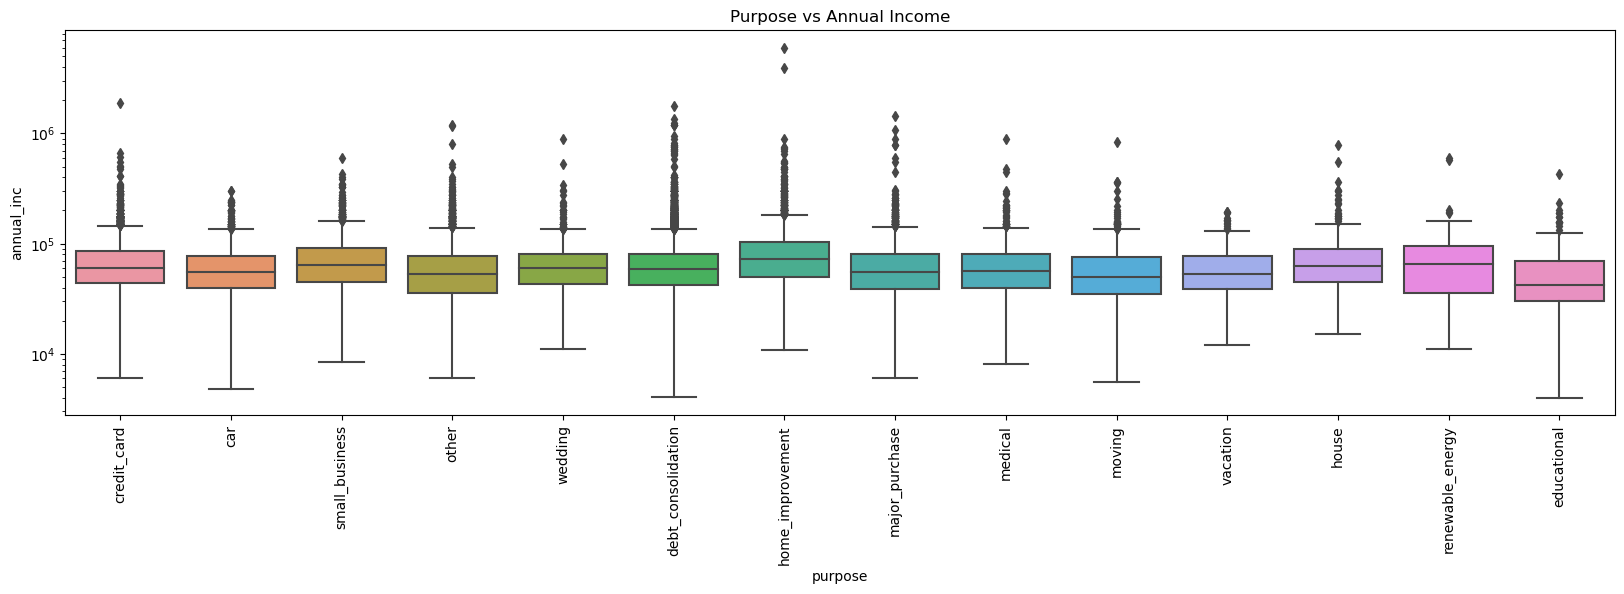

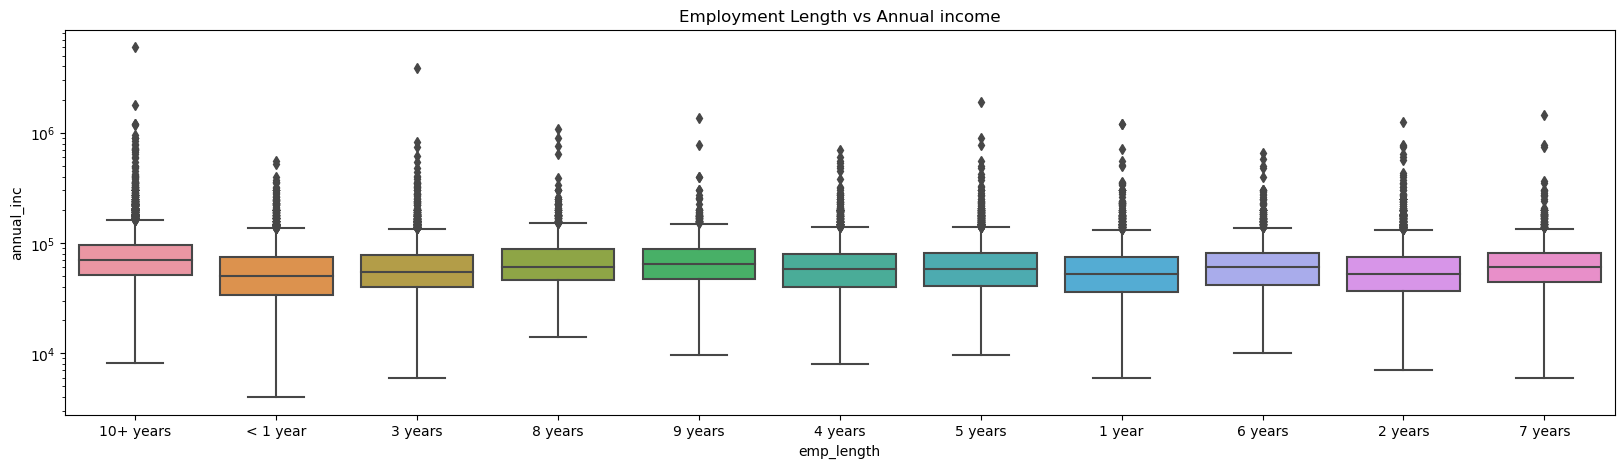

In [103]:
plt.figure(figsize=(20,5))
sns.boxplot(x='purpose', y=loan.annual_inc, data=loan)
plt.xticks(rotation=90)
plt.title('Purpose vs Annual Income')
plt.yscale('log')


plt.figure(figsize=(20,5))
sns.boxplot(x='emp_length', y=loan.annual_inc, data=loan)
plt.title('Employment Length vs Annual income')
plt.yscale('log')


##### From above we observed
- "small businesses", "home improvements" and "renewable energy" has higher annual income declared by the borrower when requesting a loan.
- More employment length indicates more annual income

# DTI (Debt To Income Ratio)

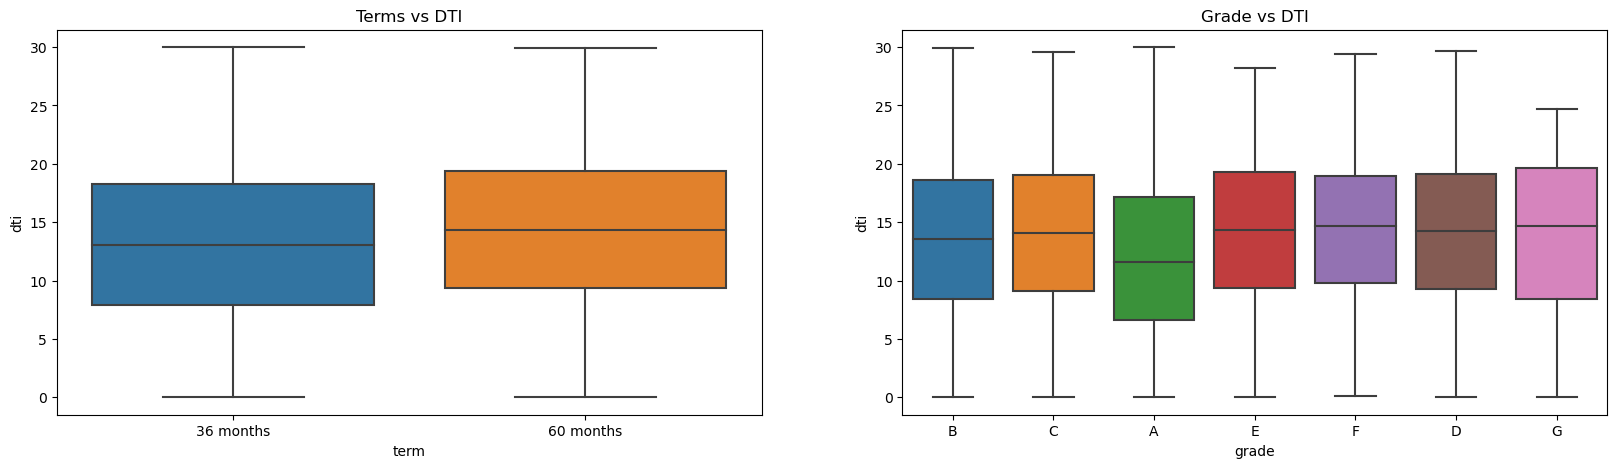

In [104]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.boxplot(x='term', y=loan.dti, data=loan)
plt.title('Terms vs DTI')
plt.subplot(122)
plt.title('Grade vs DTI')
sns.boxplot(x='grade', y=loan.dti, data=loan)
plt.show()

##### From above we observed
- The DTI is relatively high for individuals with longer tenure. 
- A Grade borrowers have a lower debt-to-income ratio (DTI) compared to borrowers in other grades.

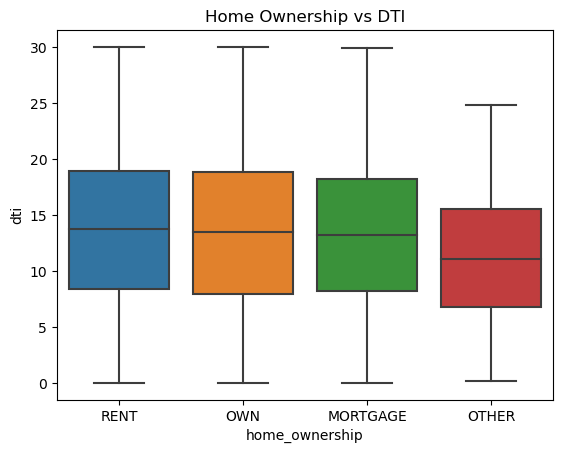

In [105]:
sns.boxplot(x='home_ownership', y=loan.dti, data=loan)
plt.title('Home Ownership vs DTI')
plt.show()

##### From above we observed
- Borrowers having home ownership "OTHER" have less DTI than others

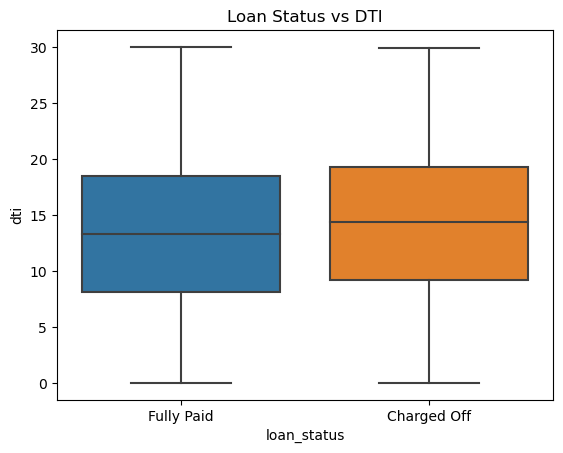

In [106]:
sns.boxplot(x='loan_status', y=loan.dti, data=loan)
plt.title('Loan Status vs DTI')
plt.show()

##### From above we observed
- Borrowers who have a high debt-to-income ratio (DTI) are slightly more likely to default on their loans.

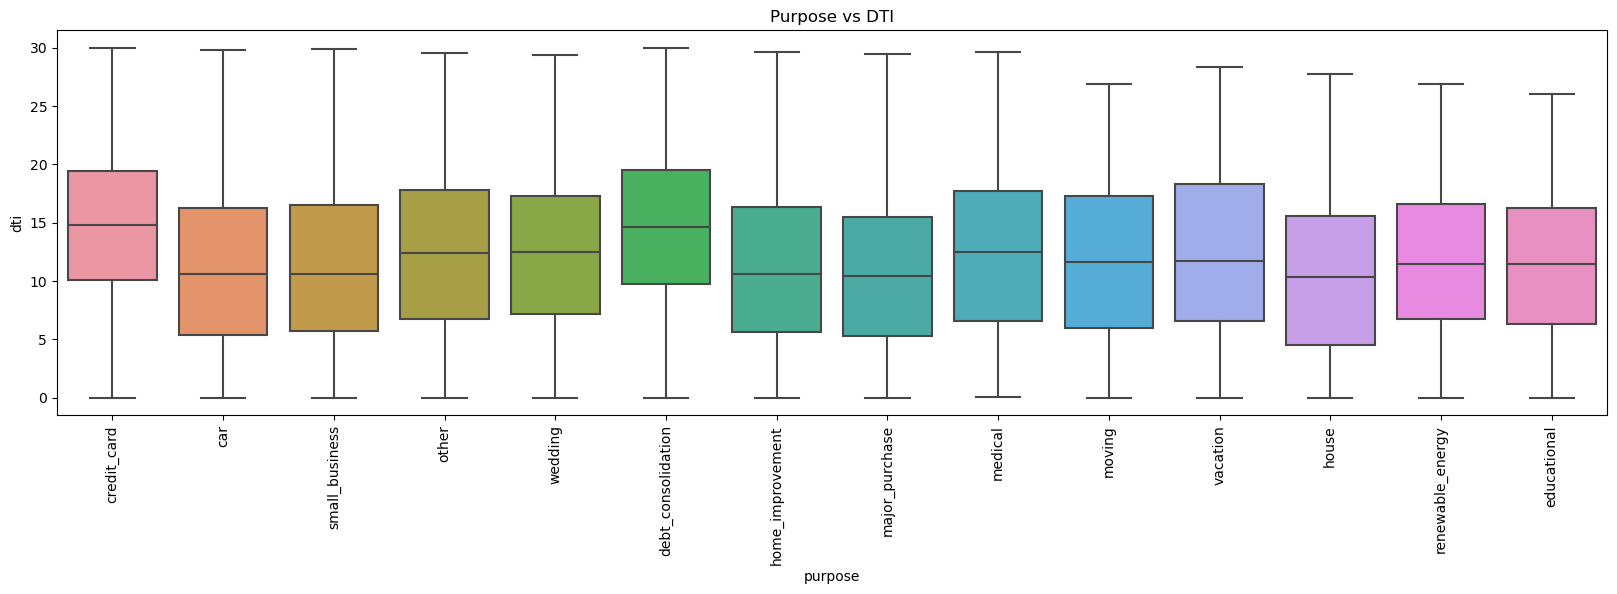

In [107]:
plt.figure(figsize=(20,5))
sns.boxplot(x='purpose', y=loan.dti, data=loan)
plt.xticks(rotation=90)
plt.title('Purpose vs DTI')
plt.show()

##### From above we observed
- Borrowers who have taken loan for debt consolidation have high DTI.

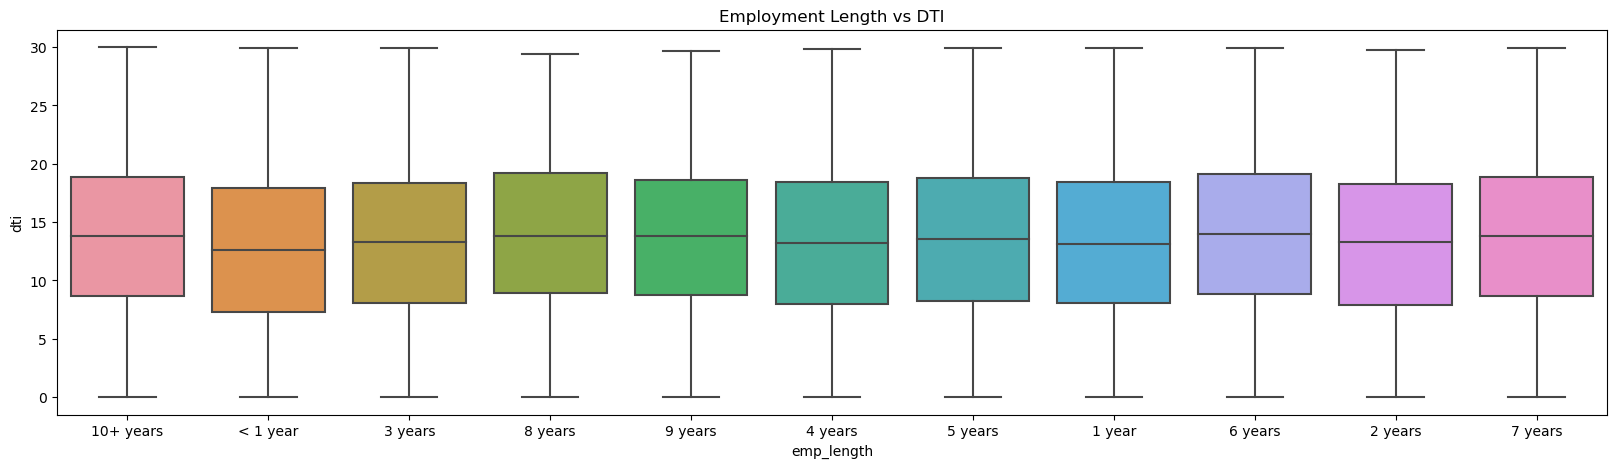

In [109]:
plt.figure(figsize=(20,5))
sns.boxplot(x='emp_length', y=loan.dti, data=loan)
plt.title('Employment Length vs DTI')
plt.show()

##### From above we observed
- The DTI is quite similar for borrowers regardless of their employment tenure.

# Public Record  Bankruptcies (pub_rec_bankruptcies)

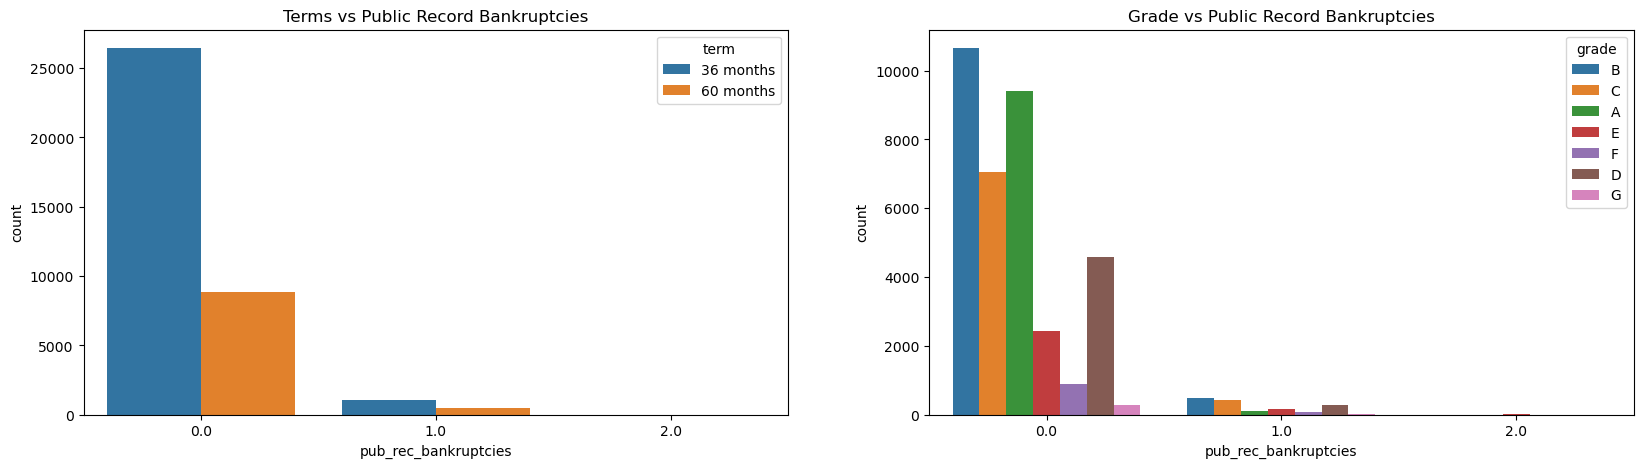

In [280]:
plt.figure(figsize=(20,5))
plt.subplot(121)
sns.countplot(x = 'pub_rec_bankruptcies', hue='term', data=loan)
plt.title('Terms vs Public Record Bankruptcies')
plt.subplot(122)
plt.title('Grade vs Public Record Bankruptcies')
sns.countplot(x = 'pub_rec_bankruptcies', hue='grade', data=loan)
plt.show()

##### From above we observed
- There are a few loan has been scanctioned with bankrupty record

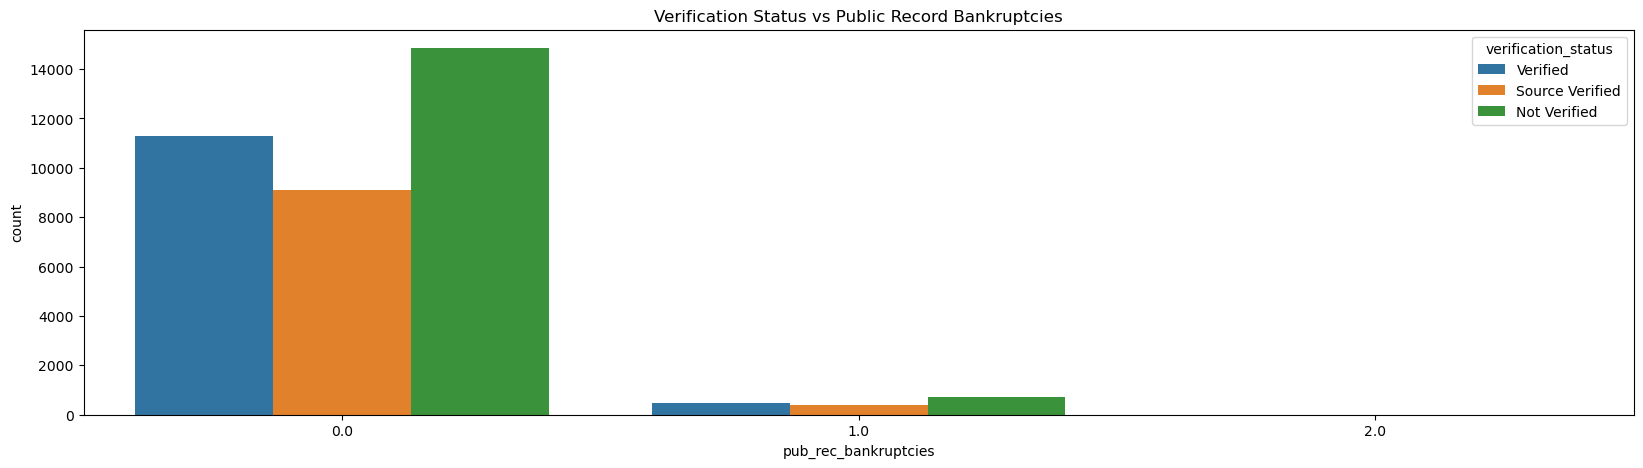

In [282]:
plt.figure(figsize=(20,5))
plt.title('Verification Status vs Public Record Bankruptcies')
sns.countplot(x = 'pub_rec_bankruptcies', hue='verification_status', data=loan)
plt.show()

##### From above we observed
- There are a few loan has been scanctioned "without verification" having public bankruptcy record.

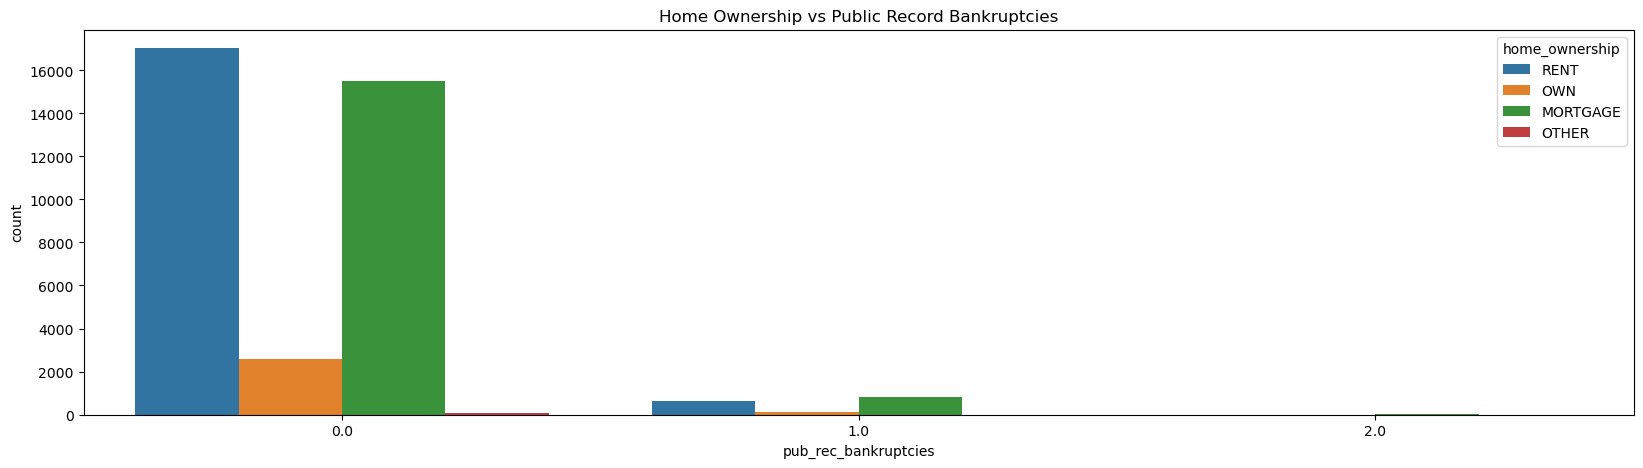

In [284]:
plt.figure(figsize=(20,5))
sns.countplot(x = 'pub_rec_bankruptcies', hue='home_ownership', data=loan)
plt.title('Home Ownership vs Public Record Bankruptcies')
plt.show()

##### From above we observed
- There are a few loan has been scanctioned for customer having 'mortgage' and has public bankruptcy record.

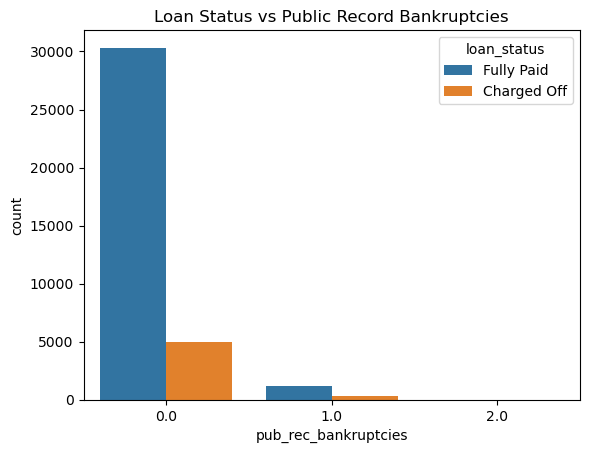

In [287]:
sns.countplot(x = 'pub_rec_bankruptcies', hue='loan_status', data=loan)
plt.title('Loan Status vs Public Record Bankruptcies')
plt.show()

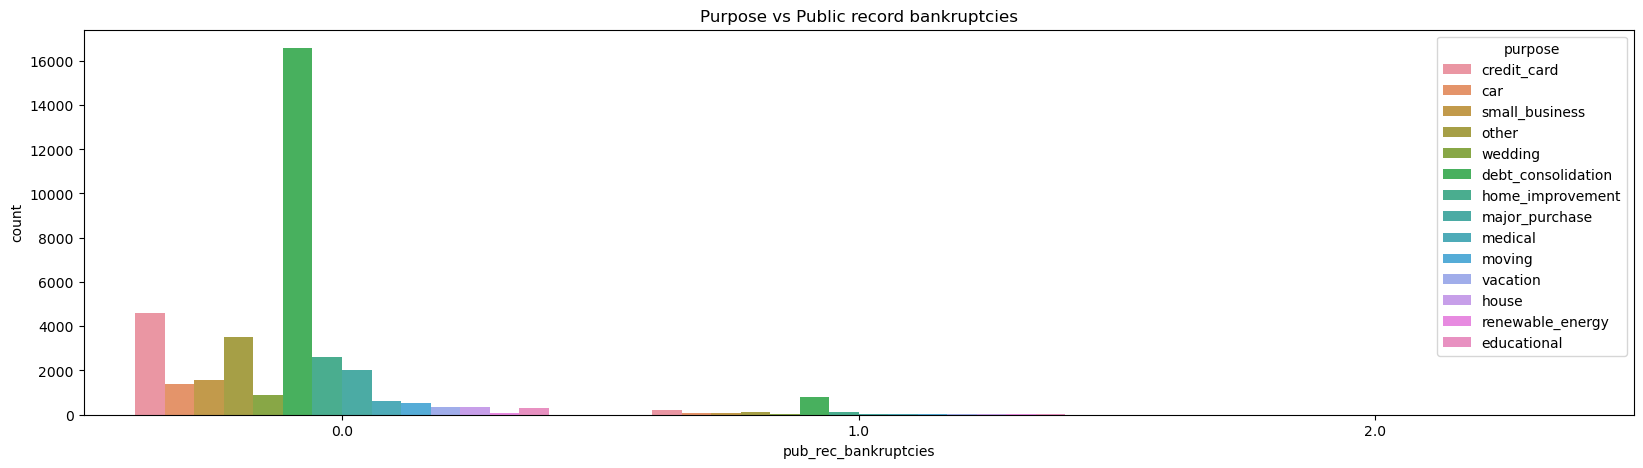

In [291]:
plt.figure(figsize=(20,5))
sns.countplot(x = 'pub_rec_bankruptcies', hue='purpose', data=loan)
plt.title('Purpose vs Public record bankruptcies')
plt.show()

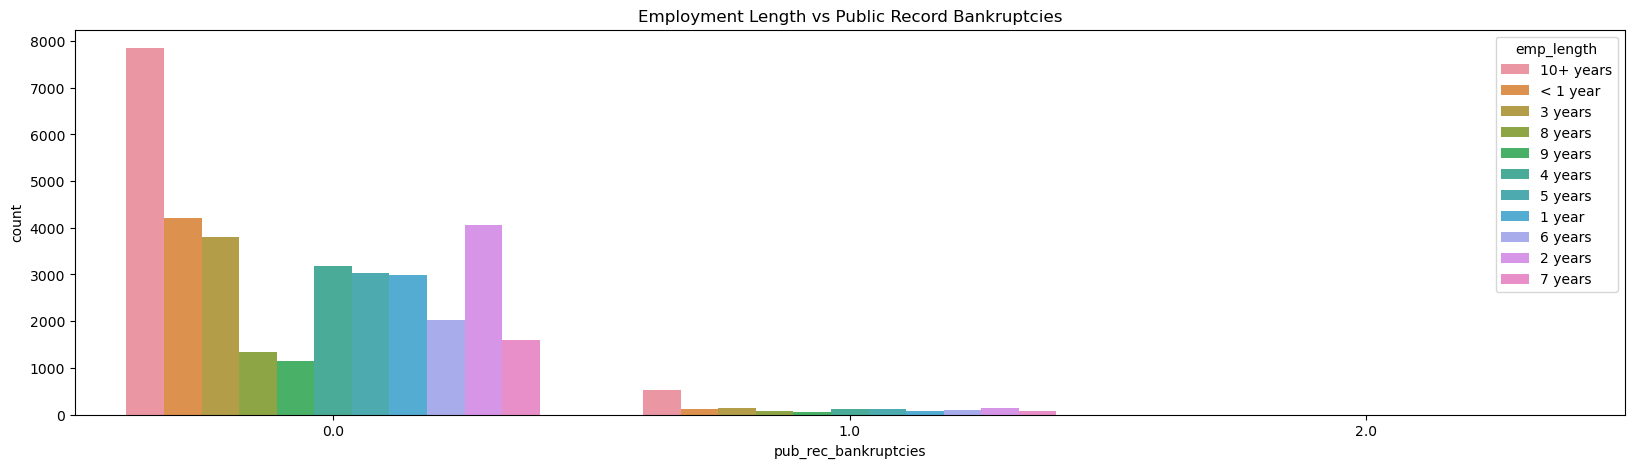

In [290]:
plt.figure(figsize=(20,5))
sns.countplot(x ='pub_rec_bankruptcies', hue='emp_length', data=loan)
plt.title('Employment Length vs Public Record Bankruptcies')
plt.show()

# Inquiry In Last 6 Months

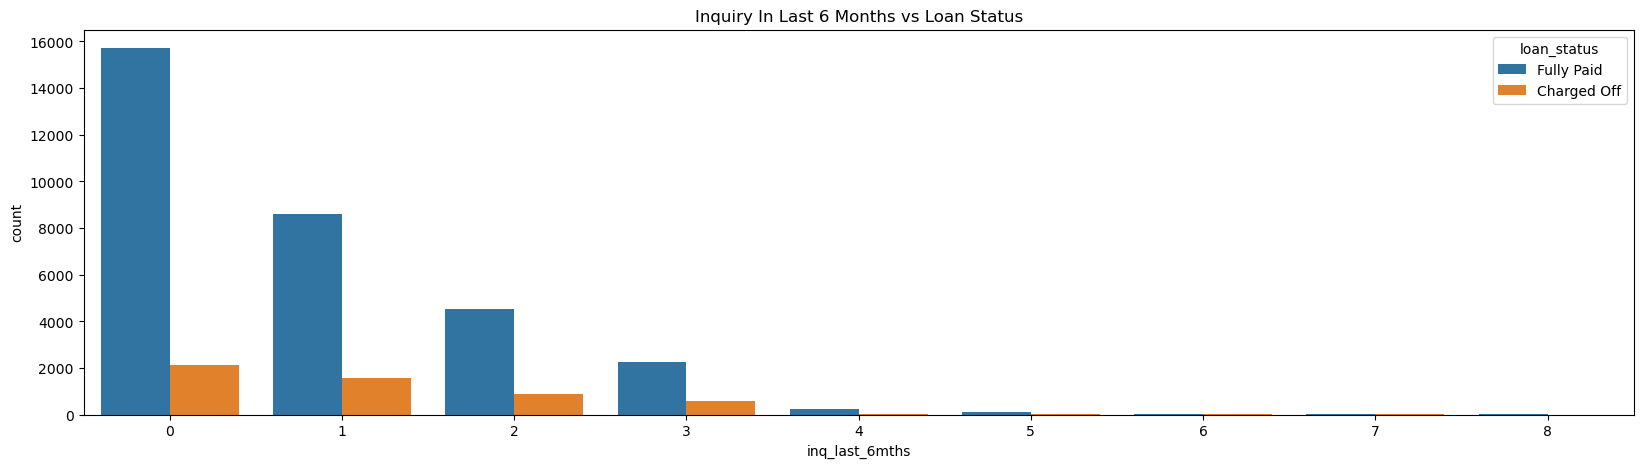

In [292]:
plt.figure(figsize=(20,5))
sns.countplot(x = 'inq_last_6mths', hue='loan_status', data=loan)
plt.title('Inquiry In Last 6 Months vs Loan Status')
plt.show()

# Bivariate Analysis